
## Increasing Property Value for Homeowners

#### This notebook will show homeowners that adding bathrooms and upgrading house grade will increase residential property value.

In [1]:
# import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "housepj", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>King County Housing Data Description</title>
</head>
<body>

<h1>Data Description for King County Housing Dataset</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Unique identifier for a house</td>
    </tr>
    <tr>
        <td>date</td>
        <td>Date the house was sold</td>
    </tr>
    <tr>
        <td>price</td>
        <td>Sale price (prediction target)</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>Number of bedrooms</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>sqft_living</td>
        <td>Square footage of living space in the home</td>
    </tr>
    <tr>
        <td>sqft_lot</td>
        <td>Square footage of the lot</td>
    </tr>
    <tr>
        <td>floors</td>
        <td>Number of floors (levels) in the house</td>
    </tr>
    <tr>
        <td>waterfront</td>
        <td>Whether the house is on a waterfront</td>
    </tr>
    <tr>
        <td>greenbelt</td>
        <td>Whether the house is adjacent to a green belt</td>
    </tr>
    <tr>
        <td>nuisance</td>
        <td>Whether the house has traffic noise or other recorded nuisances</td>
    </tr>
    <tr>
        <td>view</td>
        <td>Quality of view from the house</td>
    </tr>
    <tr>
        <td>condition</td>
        <td>Overall condition of the house (related to maintenance)</td>
    </tr>
    <tr>
        <td>grade</td>
        <td>Overall grade of the house (related to construction and design)</td>
    </tr>
    <tr>
        <td>heat_source</td>
        <td>Heat source for the house</td>
    </tr>
    <tr>
        <td>sewer_system</td>
        <td>Sewer system for the house</td>
    </tr>
    <tr>
        <td>sqft_above</td>
        <td>Square footage of the house apart from the basement</td>
    </tr>
    <tr>
        <td>sqft_basement</td>
        <td>Square footage of the basement</td>
    </tr>
    <tr>
        <td>sqft_garage</td>
        <td>Square footage of garage space</td>
    </tr>
    <tr>
        <td>sqft_patio</td>
        <td>Square footage of outdoor porch or deck space</td>
    </tr>
    <tr>
        <td>yr_built</td>
        <td>Year when the house was built</td>
    </tr>
    <tr>
        <td>yr_renovated</td>
        <td>Year when the house was renovated</td>
    </tr>
    <tr>
        <td>address</td>
        <td>Street address</td>
    </tr>
</table>

</body>
</html>




## Descriptive Statistics
#### Viewing the count, mean, std, min, 25%, 50%, 75%, and max of each column in the full dataset (add bullet points and description)

In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

#### Pre-cleaned Dataset: 30,155 Houses

#### Changed 'Renovation yr' to 'Renovation Status' to numerically intepret data
#### Created two dumbie variables 'No Renovation' and 'Renovation' to numerically intepret data

In [5]:
# Create a new column 'renovation_status' based on 'yr_renovated'
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'No Renovation' if x == 0 else 'Renovation')

# Display unique values to verify the changes
print(df['renovation_status'].unique())

# Display unique values of 'renovation_status'
print(df['renovation_status'].unique())

# Display value counts of 'renovation_status'
print(df['renovation_status'].value_counts())

renovation_stats = df.groupby('renovation_status')['price'].describe()

# Display the results
print(renovation_stats)

['No Renovation' 'Renovation']
['No Renovation' 'Renovation']
No Renovation    28783
Renovation        1372
Name: renovation_status, dtype: int64
                     count          mean           std      min       25%  \
renovation_status                                                           
No Renovation      28783.0  1.091996e+06  8.619636e+05  27360.0  643957.5   
Renovation          1372.0  1.455523e+06  1.395891e+06  30108.0  740375.0   

                         50%        75%         max  
renovation_status                                    
No Renovation       851450.0  1290000.0  30750000.0  
Renovation         1100000.0  1710875.0  23500000.0  


In [6]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Cleaning the Data

## In order to properly interpret the data, removal of missing data and duplicates is needed.


In [7]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [8]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Making Categorical Data Interpretable 
## It is necessary to create dummy variables in order to interpret the results of catagorical data and its impact on house price.

In [9]:
# Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])

#checking to see if dummy variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

# Display the column names in your DataFrame
print(df_cleaned.columns)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt     view  sqft_abo

### Search for Outliers
####  #1 Sqft_lot

In [10]:
#Viewing the bottom and top 10 values for sqft_lot
bottom_10_sqft_lot_values = df_cleaned['sqft_lot'].nsmallest(10)
print(bottom_10_sqft_lot_values)
top_10_sqft_lot_values = df_cleaned['sqft_lot'].nlargest(10)
print(top_10_sqft_lot_values)



16934    402
8788     412
12400    420
3070     435
1798     468
2410     474
4310     474
22211    474
11360    475
24071    475
Name: sqft_lot, dtype: int64
12431    3253932
13667    3067495
12180    2657160
18946    1951712
4427     1722798
10916    1576001
8412     1480604
7306     1400855
25816    1354280
28827    1277541
Name: sqft_lot, dtype: int64


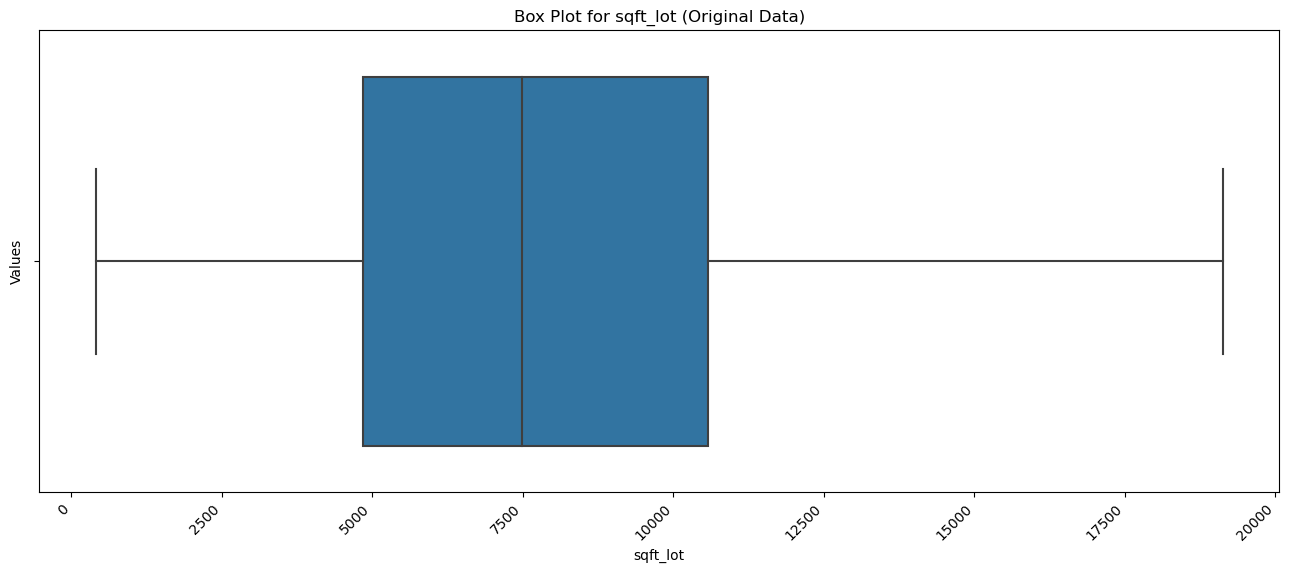

In [11]:
# Create a box plot for sqft_lot with actual values on the x-axis using the original DataFrame 
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_lot', data=df_cleaned, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_lot (Original Data)')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('sqft_lot')
plt.ylabel('Values')

plt.show()



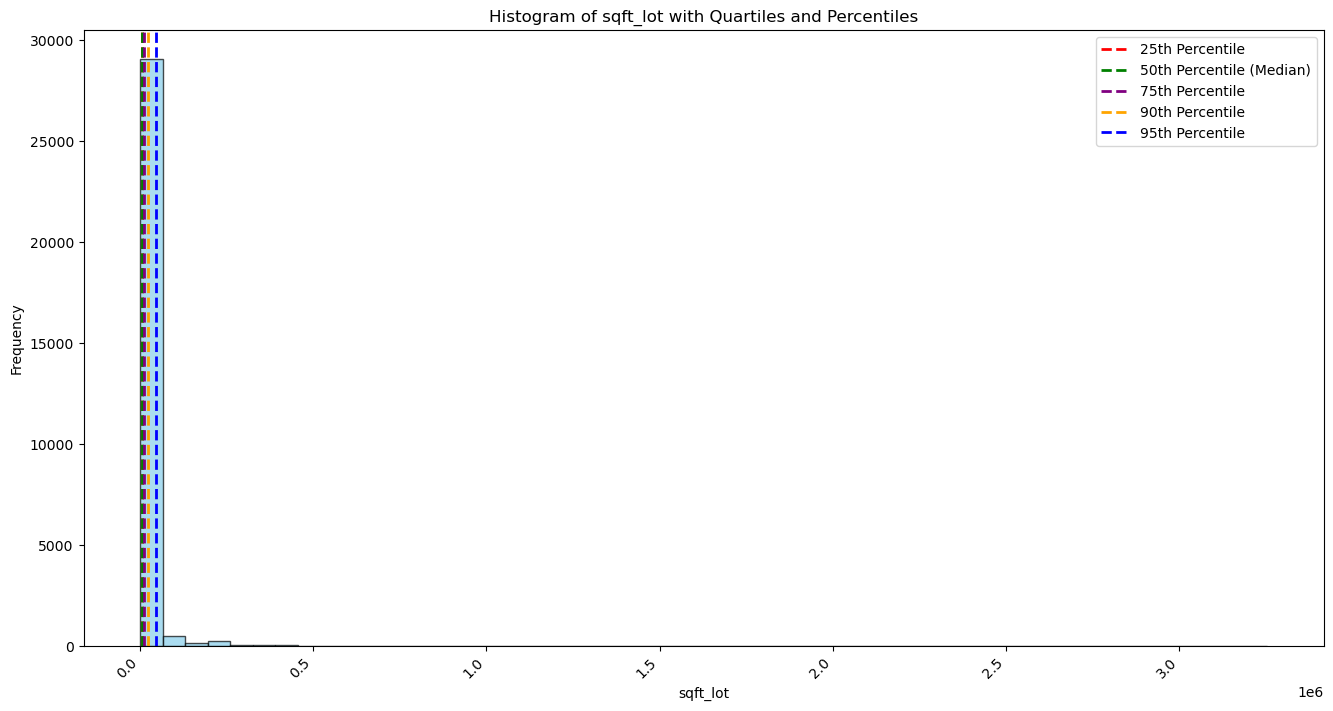

In [12]:
# Create a histogram for sqft_lot with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_lot'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_lot'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_lot with Quartiles and Percentiles')
plt.xlabel('sqft_lot')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [13]:
# Remove outliers for sqft_lot based on 1000 and 95th percentile
lower_limit = 1000
upper_limit = df_cleaned['sqft_lot'].quantile(0.95)

df_cleaned = df_cleaned[(df_cleaned['sqft_lot'] >= lower_limit) & (df_cleaned['sqft_lot'] <= upper_limit)]


In [14]:
# Print summary statistics of the original DataFrame for sqft_lot
print("df_cleaned Summary for Sqft_lot:")
print(df_cleaned['sqft_lot'].describe())




df_cleaned Summary for Sqft_lot:
count    27556.000000
mean      8988.076680
std       7212.953707
min       1000.000000
25%       5000.000000
50%       7398.000000
75%      10010.000000
max      45563.000000
Name: sqft_lot, dtype: float64


#### #2 Sqft_above

In [15]:
# Print summary statistics of the DataFrame
print("df_cleaned Summary for Sqft_above:")
print(df_cleaned['sqft_above'].describe())

#Viewing the bottom and top 10 values for sqft_above
bottom_10_sqft_above_values = df_cleaned['sqft_above'].nsmallest(10)
print(bottom_10_sqft_above_values)
top_10_sqft_above_values = df_cleaned['sqft_above'].nlargest(10)
print(top_10_sqft_above_values)




df_cleaned Summary for Sqft_above:
count    27556.000000
mean      1801.334011
std        838.736726
min        260.000000
25%       1190.000000
50%       1570.000000
75%       2260.000000
max       8882.000000
Name: sqft_above, dtype: float64
8694     260
8391     290
23622    290
12473    300
11989    310
476      320
11420    320
13015    320
29356    340
14598    350
Name: sqft_above, dtype: int64
20817    8882
635      8280
25561    8070
6936     7780
708      7627
14277    7590
29865    7400
22681    7240
27774    7140
2130     7020
Name: sqft_above, dtype: int64


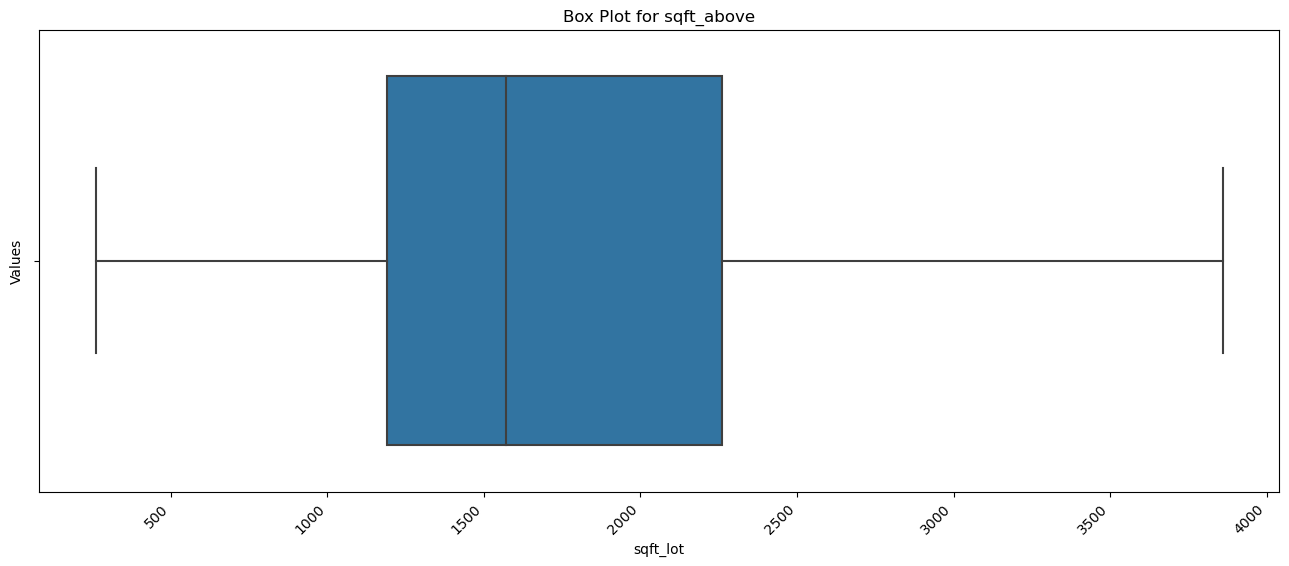

In [16]:
# Create a box plot for sqft_above with actual values on the x-axis using the DataFrame
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_above', data=df_cleaned, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_above')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel('sqft_lot')
plt.ylabel('Values')
plt.show()


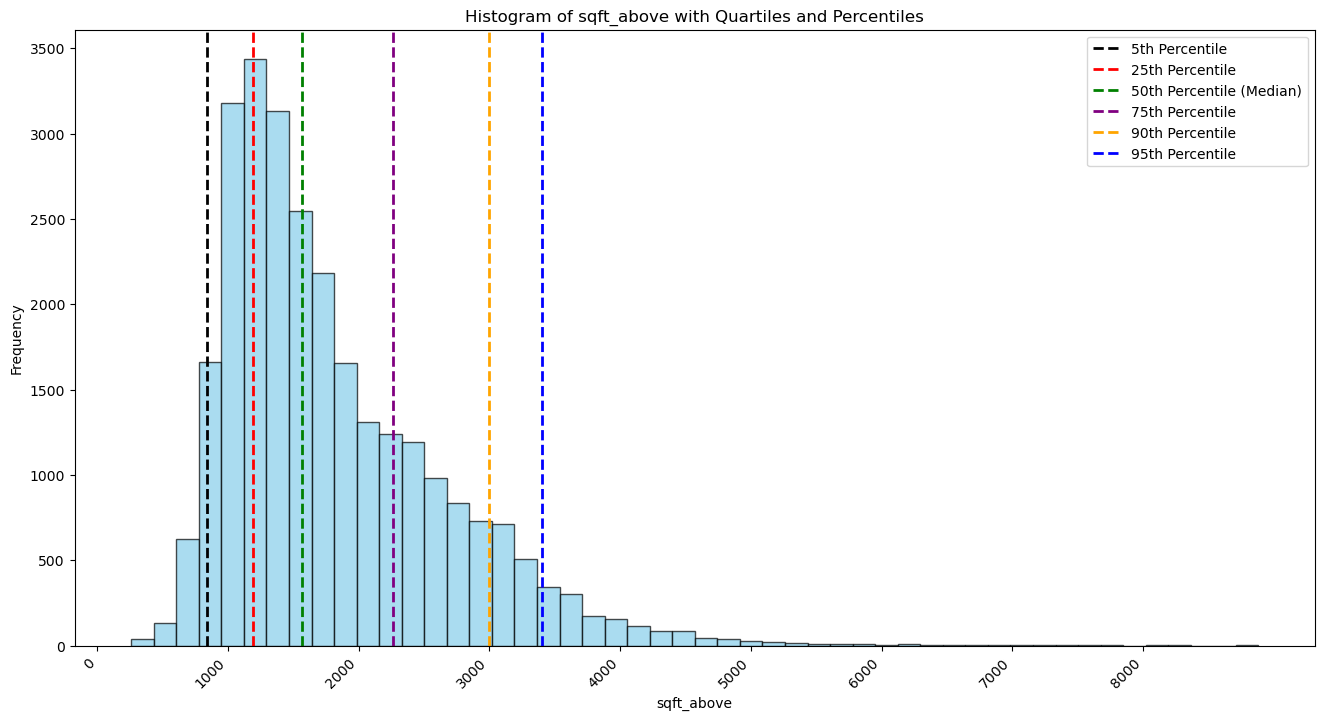

In [17]:
# Create a histogram for sqft_above with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_above'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_above'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_above'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_above with Quartiles and Percentiles')
plt.xlabel('sqft_above')
plt.ylabel('Frequency')

plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


In [18]:
# Remove outliers for sqft_above
lower_limit_sqft_above = 800
upper_limit_sqft_above = 3500

df_cleaned = df_cleaned[(df_cleaned['sqft_above'] >= lower_limit_sqft_above) & (df_cleaned['sqft_above'] <= upper_limit_sqft_above)]


In [19]:

# Print summary statistics of the filtered DataFrame
print("(sqft_above) Summary:")
print(df_cleaned['sqft_above'].describe())


(sqft_above) Summary:
count    25448.000000
mean      1735.243045
std        663.049182
min        800.000000
25%       1210.000000
50%       1560.000000
75%       2170.000000
max       3500.000000
Name: sqft_above, dtype: float64


#### #3 Sqft_basement

In [20]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_basement'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

top_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().tail(10)
print(top_10_sqft_basement)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    25448.000000
mean       492.165082
std        568.083592
min          0.000000
25%          0.000000
50%          0.000000
75%        980.000000
max       3910.000000
Name: sqft_basement, dtype: float64
0      12827
60         1
70         1
80         7
100        7
110        7
120       10
130        4
140       10
150        7
Name: sqft_basement, dtype: int64
3090    1
3110    1
3180    1
3220    1
3500    1
3560    1
3590    1
3640    1
3710    1
3910    1
Name: sqft_basement, dtype: int64


In [21]:


# Filter out 0 values in the 'sqft_basement' column
non_zero_sqft_basement = df_cleaned[df_cleaned['sqft_basement'] > 0]['sqft_basement']

# Display the smallest and largest 10 unique non-zero values
smallest_10_non_zero_sqft_basement = np.sort(np.unique(non_zero_sqft_basement))[:10]
largest_10_non_zero_sqft_basement = np.sort(np.unique(non_zero_sqft_basement))[::-1][:10]

print("Smallest 10 unique non-zero sqft_basement values:")
print(smallest_10_non_zero_sqft_basement)

print("\nLargest 10 unique non-zero sqft_basement values:")
print(largest_10_non_zero_sqft_basement)



Smallest 10 unique non-zero sqft_basement values:
[ 60  70  80 100 110 120 130 140 150 160]

Largest 10 unique non-zero sqft_basement values:
[3910 3710 3640 3590 3560 3500 3220 3180 3110 3090]


#### Searching for outliers in sqft_basement without removing houses that do not have a basement.

In [22]:
# Create a DataFrame without 0 values in 'sqft_basement' for summary statistics
df_no_zeros = df_cleaned.query('sqft_basement > 0')

# Display summary statistics for 'sqft_basement' without 0 values
summary_no_zeros = df_no_zeros['sqft_basement'].describe()

# Print the summary statistics
print(summary_no_zeros)


count    12621.000000
mean       992.363283
std        392.827802
min         60.000000
25%        720.000000
50%        980.000000
75%       1220.000000
max       3910.000000
Name: sqft_basement, dtype: float64


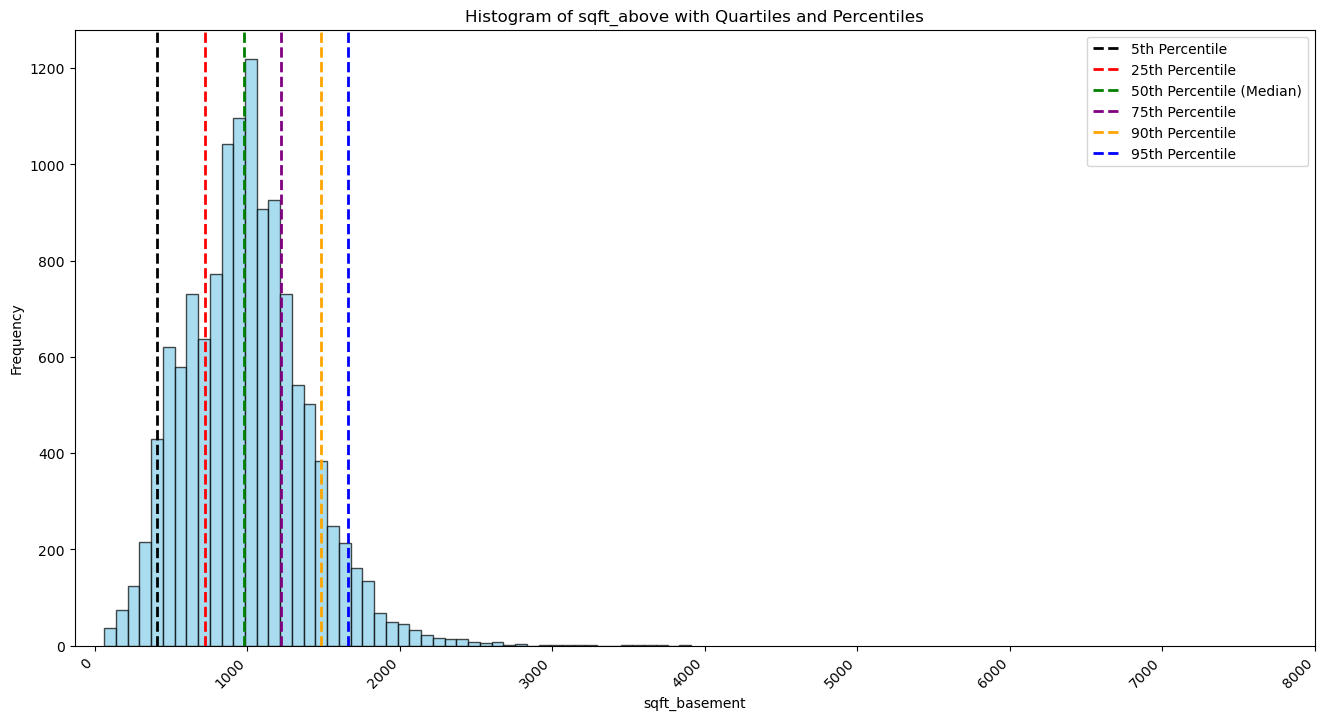

In [23]:
# Create a histogram for sqft_basement with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zeros['sqft_basement'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_above with Quartiles and Percentiles')
plt.xlabel('sqft_basement')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


In [24]:
# Remove outliers for 'sqft_basement' excluding 0 values
lower_limit_sqft_basement = 400
upper_limit_sqft_basement = 2000

df_cleaned = df_cleaned[(df_cleaned['sqft_basement'] >= lower_limit_sqft_basement) | (df_cleaned['sqft_basement'] == 0) & (df_cleaned['sqft_basement'] <= upper_limit_sqft_basement)]

# Display summary statistics for 'sqft_basement' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_basement'].describe()

# Print the summary statistics for 'sqft_basement' in the filtered DataFrame
print(summary_df_cleaned)


count    24904.000000
mean       496.620784
std        573.316062
min          0.000000
25%          0.000000
50%          0.000000
75%        990.000000
max       3910.000000
Name: sqft_basement, dtype: float64


In [25]:
# Display the bottom 10 values for sqft_basement
bottom_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

0      12827
400       55
404        1
410       37
416        1
417        1
420       76
429        1
430       74
440       88
Name: sqft_basement, dtype: int64


#### #4 Sqft_garage

In [26]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_garage'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_garage = df_cleaned['sqft_garage'].value_counts().sort_index().head(10)
print(bottom_10_sqft_garage)

top_10_sqft_garage = df_cleaned['sqft_garage'].value_counts().sort_index().tail(10)
print(top_10_sqft_garage)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    24904.000000
mean       329.918487
std        256.723560
min          0.000000
25%          0.000000
50%        400.000000
75%        500.000000
max       2840.000000
Name: sqft_garage, dtype: float64
0      7462
40        1
70        2
80        5
90        2
100       3
110       5
120       4
130       9
140      14
Name: sqft_garage, dtype: int64
1560    1
1590    1
1660    1
1670    1
1740    1
1788    1
1840    1
2030    1
2240    1
2840    1
Name: sqft_garage, dtype: int64


In [27]:


# Filter out 0 values in the 'sqft_garage' column
non_zero_sqft_garage = df_cleaned[df_cleaned['sqft_garage'] > 0]['sqft_garage']

# Display the smallest and largest 10 unique non-zero values
smallest_10_non_zero_sqft_garage = np.sort(np.unique(non_zero_sqft_garage))[:10]
largest_10_non_zero_sqft_garage = np.sort(np.unique(non_zero_sqft_garage))[::-1][:10]

print("Smallest 10 unique non-zero sqft_garage values:")
print(smallest_10_non_zero_sqft_garage)

print("\nLargest 10 unique non-zero sqft_garage values:")
print(largest_10_non_zero_sqft_garage)


Smallest 10 unique non-zero sqft_garage values:
[ 40  70  80  90 100 110 120 130 140 145]

Largest 10 unique non-zero sqft_garage values:
[2840 2240 2030 1840 1788 1740 1670 1660 1590 1560]


#### Searching for outliers in sqft_garage without removing houses that do not have a garage.

In [28]:
# Create a DataFrame without 0 values in 'sqft_garage' for summary statistics
df_no_zerosg = df_cleaned.query('sqft_garage > 0')

# Display summary statistics for 'sqft_garage' without 0 values
summary_no_zerosg = df_no_zerosg['sqft_garage'].describe()

# Print the summary statistics
print(summary_no_zerosg)


count    17442.000000
mean       471.063525
std        166.170699
min         40.000000
25%        390.000000
50%        460.000000
75%        550.000000
max       2840.000000
Name: sqft_garage, dtype: float64


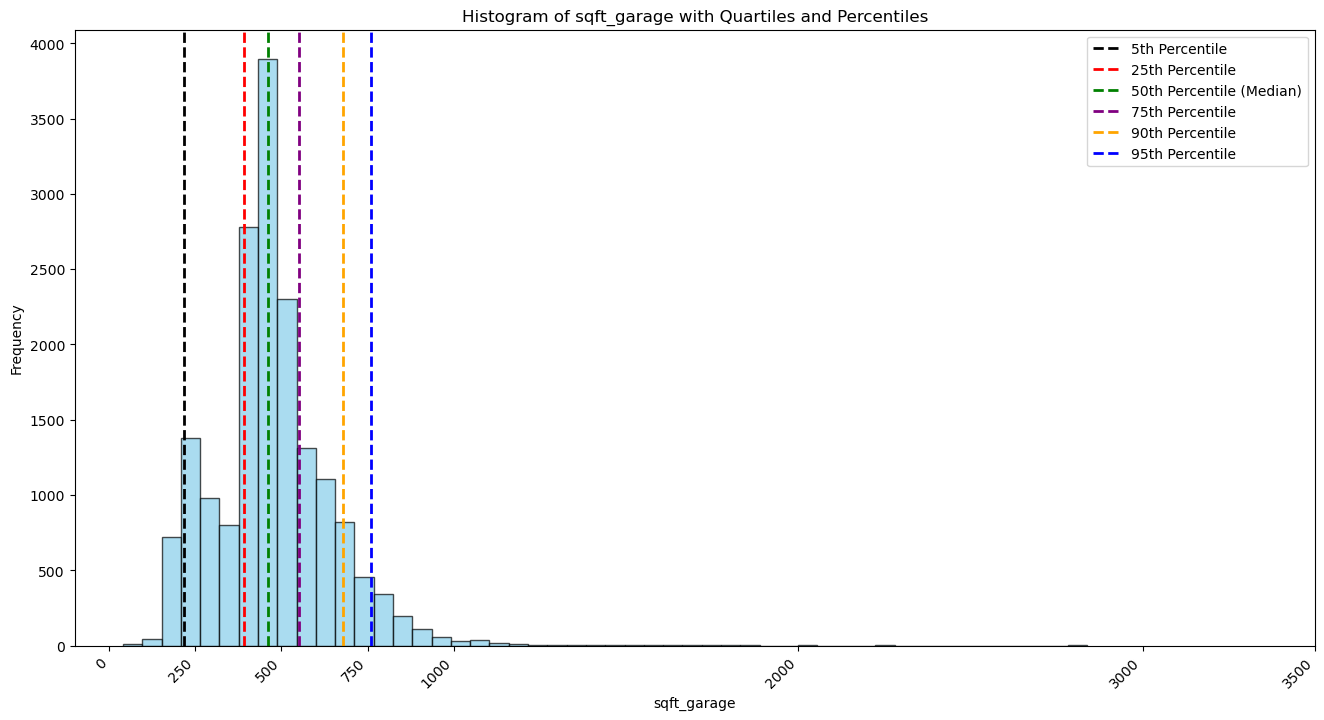

In [29]:
# Create a histogram for sqft_basement with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zerosg['sqft_garage'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_garage with Quartiles and Percentiles')
plt.xlabel('sqft_garage')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 250, 500, 750, 1000, 2000, 3000, 3500]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()



In [30]:
# Remove outliers for 'sqft_garage' excluding 0 values
lower_limit_sqft_garage = 200
upper_limit_sqft_garage = 800

df_cleaned = df_cleaned[(df_cleaned['sqft_garage'] >= lower_limit_sqft_garage) | ((df_cleaned['sqft_garage'] == 0) | (df_cleaned['sqft_garage'] <= upper_limit_sqft_garage))]

# Display summary statistics for 'sqft_garage' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_garage'].describe()

# Print the summary statistics for 'sqft_garage' in the filtered DataFrame
print(summary_df_cleaned)


count    24904.000000
mean       329.918487
std        256.723560
min          0.000000
25%          0.000000
50%        400.000000
75%        500.000000
max       2840.000000
Name: sqft_garage, dtype: float64


#### #5 Sqft_patio

In [31]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_patio'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_patio = df_cleaned['sqft_patio'].value_counts().sort_index().head(10)
print(bottom_10_sqft_patio)

top_10_sqft_patio = df_cleaned['sqft_patio'].value_counts().sort_index().tail(10)
print(top_10_sqft_patio)
# Filter the DataFrame to exclude rows with outliers

Original DataFrame Summary:
count    24904.000000
mean       199.890218
std        219.753121
min          0.000000
25%         40.000000
50%        140.000000
75%        290.000000
max       2210.000000
Name: sqft_patio, dtype: float64
0     5772
8        1
10      16
12       1
15       4
18       1
20      97
22       1
24       3
25       5
Name: sqft_patio, dtype: int64
1700    1
1750    1
1810    1
1860    1
1870    1
1900    1
2000    1
2030    1
2040    1
2210    1
Name: sqft_patio, dtype: int64


#### Searching for outliers in sqft_patio without removing houses that do not have a patio.

In [32]:
# Create a DataFrame without 0 values in 'sqft_patio' for summary statistics
df_no_zerosp = df_cleaned.query('sqft_patio > 0')

# Display summary statistics for 'sqft_patio' without 0 values
summary_no_zerosp = df_no_zerosp['sqft_patio'].describe()

# Print the summary statistics
print(summary_no_zerosp)


count    19132.000000
mean       260.195798
std        217.185011
min          8.000000
25%        100.000000
50%        200.000000
75%        350.000000
max       2210.000000
Name: sqft_patio, dtype: float64


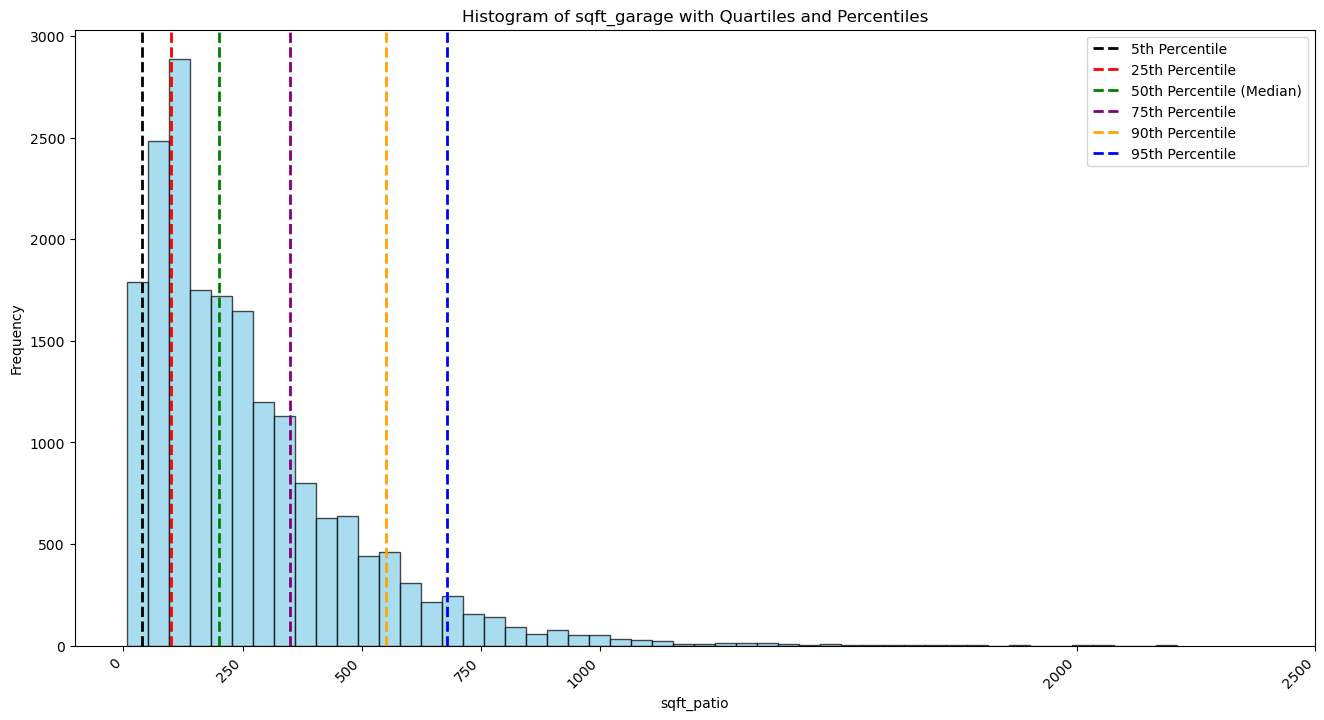

In [33]:
# Create a histogram for sqft_patio with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zerosp['sqft_patio'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_garage with Quartiles and Percentiles')
plt.xlabel('sqft_patio')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 250, 500, 750, 1000, 2000, 2500]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


In [34]:
# Remove outliers for 'sqft_patio' excluding 0 values
lower_limit_sqft_patio = 40
upper_limit_sqft_patio = 750

df_cleaned = df_cleaned[(df_cleaned['sqft_patio'] >= lower_limit_sqft_patio) | ((df_cleaned['sqft_patio'] == 0) | (df_cleaned['sqft_patio'] <= upper_limit_sqft_patio))]

# Display summary statistics for 'sqft_patio' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_patio'].describe()

# Print the summary statistics for 'sqft_patio' in the filtered DataFrame
print(summary_df_cleaned)


count    24904.000000
mean       199.890218
std        219.753121
min          0.000000
25%         40.000000
50%        140.000000
75%        290.000000
max       2210.000000
Name: sqft_patio, dtype: float64


#### Creating a box plot to visualize sqft_patio data after removing outliers.

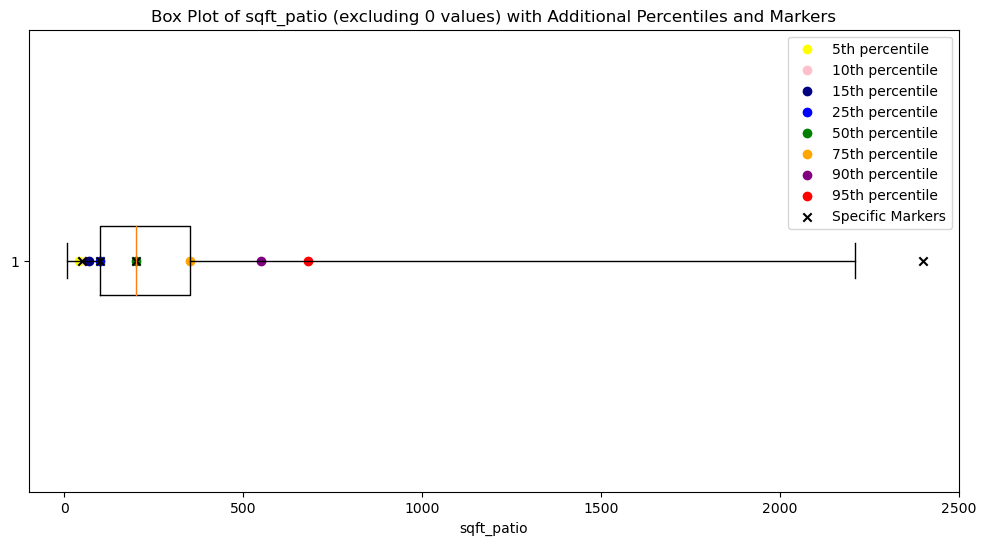

In [35]:

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

# Set x-axis limits
plt.xlim(-100, 2500)

# Add specific markers for 50, 100, 200-2400
plt.scatter([50, 100, 200, 2400], [1, 1, 1, 1], marker='x', color='black', label='Specific Markers')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles and Markers')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()


# Searching for outliers for bedrooms, bathrooms, sqft_living and floors.

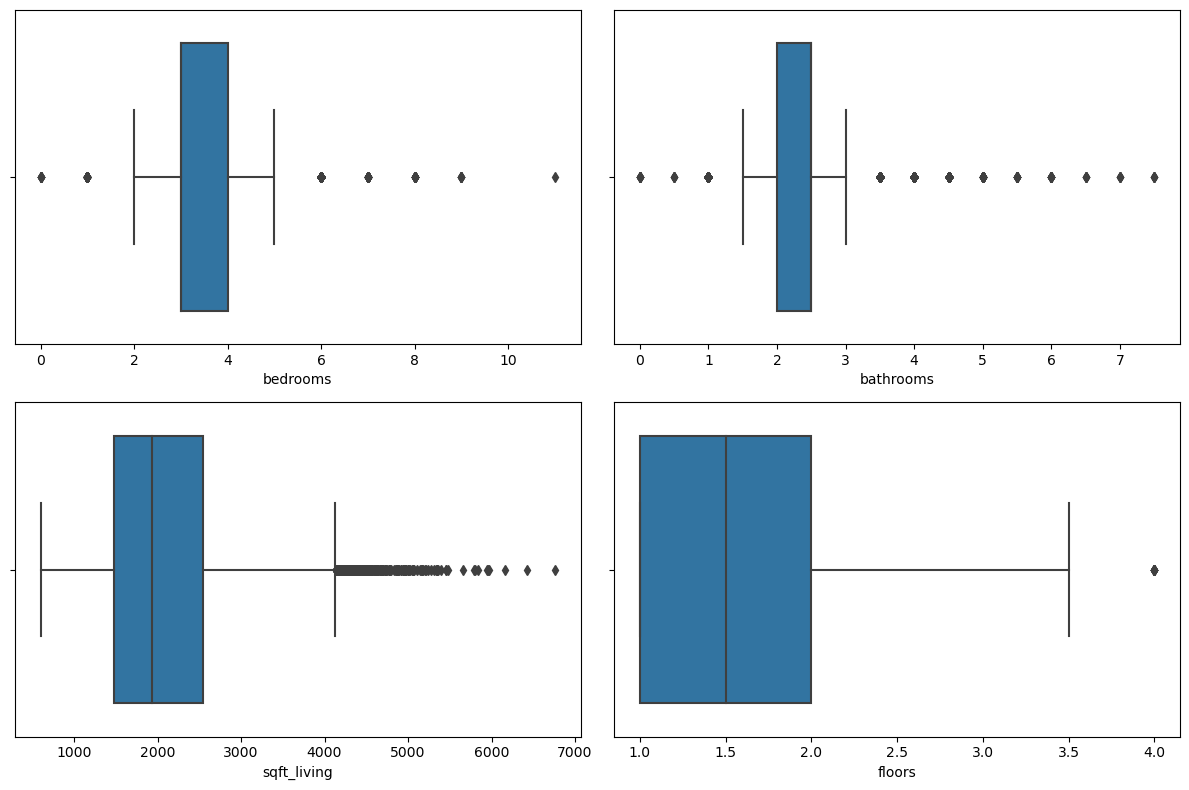

In [36]:
variables_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create individual box plots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=variable, data=df_cleaned)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [37]:
bottom_10_sqft_living = df_cleaned.nsmallest(10, 'sqft_living')
print(bottom_10_sqft_living[['sqft_living']])



       sqft_living
873            600
11173          620
2987           750
18094          750
370            800
1219           800
1795           800
2199           800
2627           800
3175           800


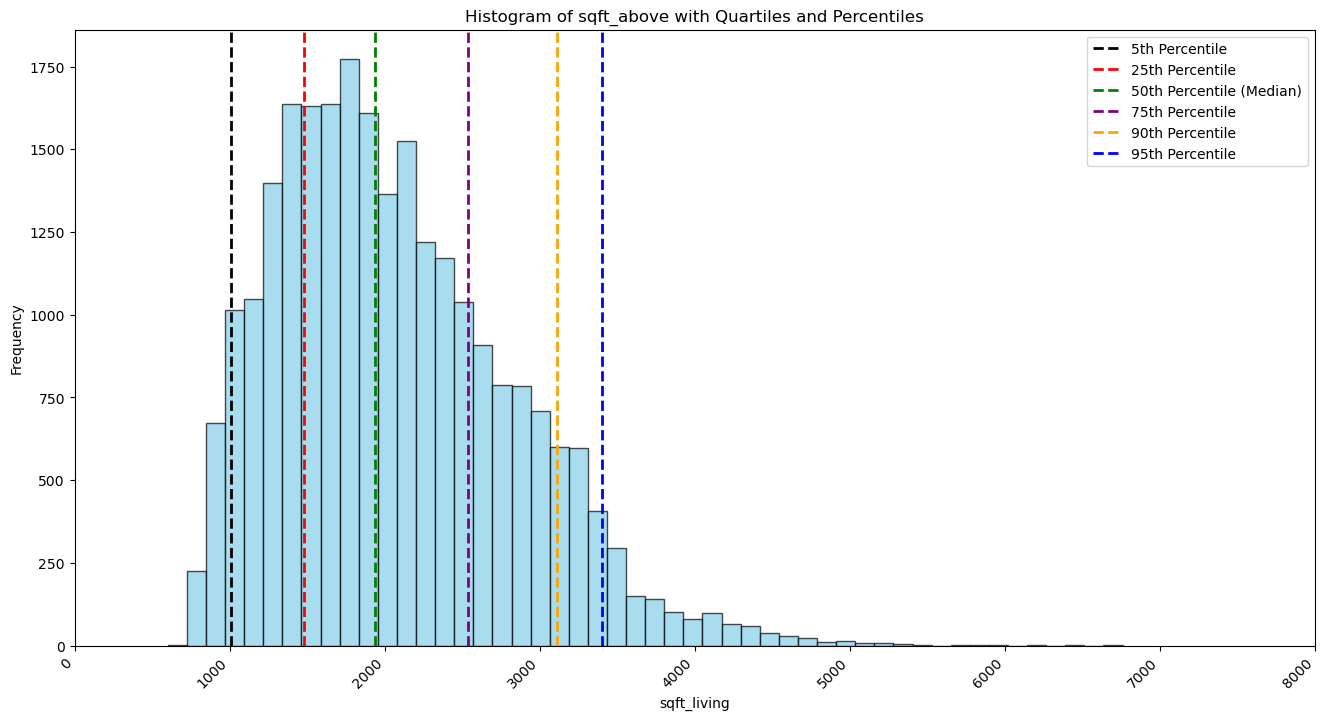

In [38]:
# Create a histogram for sqft_living with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_living'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_living'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_living'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_above with Quartiles and Percentiles')
plt.xlabel('sqft_living')
plt.ylabel('Frequency')

plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()

In [39]:
# Remove outliers for sqft_living
lower_limit_sqft_living = 800
upper_limit_sqft_living = 3500

df_cleaned = df_cleaned[(df_cleaned['sqft_living'] >= lower_limit_sqft_living) & (df_cleaned['sqft_living'] <= upper_limit_sqft_living)]

In [40]:
# Display the bottom 10 values for bedrooms
bottom_10_bedrooms = df_cleaned.sort_values(by='bedrooms').head(10)
print(bottom_10_bedrooms[['bedrooms']])


       bedrooms
8338          0
7545          0
16521         0
1952          0
11471         0
573           0
27540         0
29574         0
1310          0
1289          0


In [41]:
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  3  2  1  0  7  8  9 11]


In [42]:
#Remove homes with less than 1 bedroom
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 0]
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  3  2  1  7  8  9 11]


In [43]:
#Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())

[1.  2.5 2.  3.  1.5 3.5 4.  5.5 5.  4.5 6.  7.5 6.5 0.5 0.  7. ]


In [44]:
df_cleaned = df_cleaned[(df_cleaned['bathrooms'] != 0) & (df_cleaned['bathrooms'] != 0.5)]
# Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())


[1.  2.5 2.  3.  1.5 3.5 4.  5.5 5.  4.5 6.  7.5 6.5 7. ]


In [45]:
#Display unique values to verify the changes
print(df_cleaned['floors'].unique())

[1.  2.  1.5 3.  2.5 4.  3.5]


In [46]:
#descriptive statistics
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,renovation_status_No Renovation,renovation_status_Renovation,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,nuisance_NO,nuisance_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
count,2.396000e+04,2.396000e+04,23960.00000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.0,23960.0,23960.0,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000
mean,4.666454e+09,9.899133e+05,3.42884,2.248957,1984.127671,8771.801711,1.482513,1704.453631,457.975000,324.132387,190.796953,1972.937396,86.898038,47.422514,-121.739358,0.591611,0.006636,0.284808,0.001377,0.115568,0.184307,0.001795,0.706928,0.002713,0.103798,0.000167,0.000292,0.956511,0.043489,0.022955,0.002129,0.000167,0.0,0.0,0.0,0.000250,0.006469,0.088940,0.444908,0.325876,0.108306,0.835518,0.164482,0.111269,0.000083,0.888564,0.000083
std,2.878413e+09,5.589047e+05,0.85700,0.736056,659.807411,6928.357060,0.526547,640.294497,539.519046,253.211591,210.568577,30.792909,407.561324,1.069996,4.170782,0.491546,0.081193,0.451332,0.037087,0.319712,0.387743,0.042326,0.455181,0.052015,0.305005,0.012920,0.017090,0.203960,0.203960,0.149763,0.046088,0.012920,0.0,0.0,0.0,0.015823,0.080172,0.284663,0.496966,0.468711,0.310772,0.370721,0.370721,0.314471,0.009136,0.314678,0.009136
min,1.000055e+06,2.756300e+04,1.00000,1.000000,800.000000,1000.000000,1.000000,800.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,25.847715,-147.337806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.212900e+09,6.330000e+05,3.00000,2.000000,1469.500000,5000.000000,1.000000,1200.000000,0.000000,0.000000,30.000000,1953.000000,0.000000,47.398228,-122.326698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.022900e+09,8.440000e+05,3.00000,2.500000,1900.000000,7356.500000,1.500000,1540.000000,0.000000,400.000000,130.000000,1975.000000,0.000000,47.547236,-122.234310,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.349640e+09,1.215062e+06,4.00000,2.500000,2450.000000,9830.500000,2.000000,2107.750000,950.000000,500.000000,280.000000,1999.000000,0.000000,47.671712,-122.132748,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.904000e+09,9.500

# Removal of Unnecessary Columns 

#### This model removes variables that are out of homeowners' control, including: address, latitude, longitude, date, year built, year renovated, greenbelt, view and waterfront. 
#### Removing this data provides homeowners a clearer understanding of variables that contribute to increasing property value.

In [47]:
# List of columns to remove
columns_to_remove = ['address','lat', 'long','date','yr_built', 'yr_renovated', 'greenbelt', 'view','waterfront']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
5  2807100156  625000.0         2        1.0         1190      5688     1.0   

   sqft_above  sqft_basement  sqft_garage  sqft_patio  condition_Average  \
0        1180              0            0          40                  0   
1        1570           1570            0         240                  1   
2        1580           1580            0           0                  1   
3        1090           1070          200         270                  1   
5        1190              0          300           0                  1   

   condition_Fair  condition_Good  condition_Poor  condition_Very Go

# Using StatsModels for Multiple Linear Regression

In [48]:
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     455.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:23:55   Log-Likelihood:            -3.4524e+05
No. Observations:               23960   AIC:                         6.905e+05
Df Residuals:                   23926   BIC:                         6.908e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Results from multiple linear regression model
#### R-Squared = 0.386 -indicates this model explains about 39% of the variance of price
#### P-Values - each p value is teting the null hypothesis of each coefficent is equal to zero. P values <.05 are significant
#### Coefficents- Represent the estimated change in price for a one-unit change in the corresponding predictor variable. (hold all other variables constant)


In [49]:
# view model coefficients
model.params


const                              3.923079e+05
id                                -2.033897e-06
bedrooms                          -2.951557e+04
bathrooms                          2.593508e+04
sqft_living                        7.363872e+01
sqft_lot                           5.441940e+00
floors                            -5.044697e+04
sqft_above                         1.794791e+02
sqft_basement                      1.692677e+02
sqft_garage                       -2.781672e+02
sqft_patio                         9.777511e+01
condition_Average                  6.526761e+04
condition_Fair                     7.017576e+04
condition_Good                     1.573630e+05
condition_Poor                    -1.374132e+05
condition_Very Good                2.369147e+05
heat_source_Electricity           -3.501583e+04
heat_source_Electricity/Solar     -6.638899e+04
heat_source_Gas                   -3.136873e+03
heat_source_Gas/Solar              9.502392e+04
heat_source_Oil                    2.645

# Creation of Tornado Chart
#### Visual representation of the impact of each coefficent on the dependt variable (price)

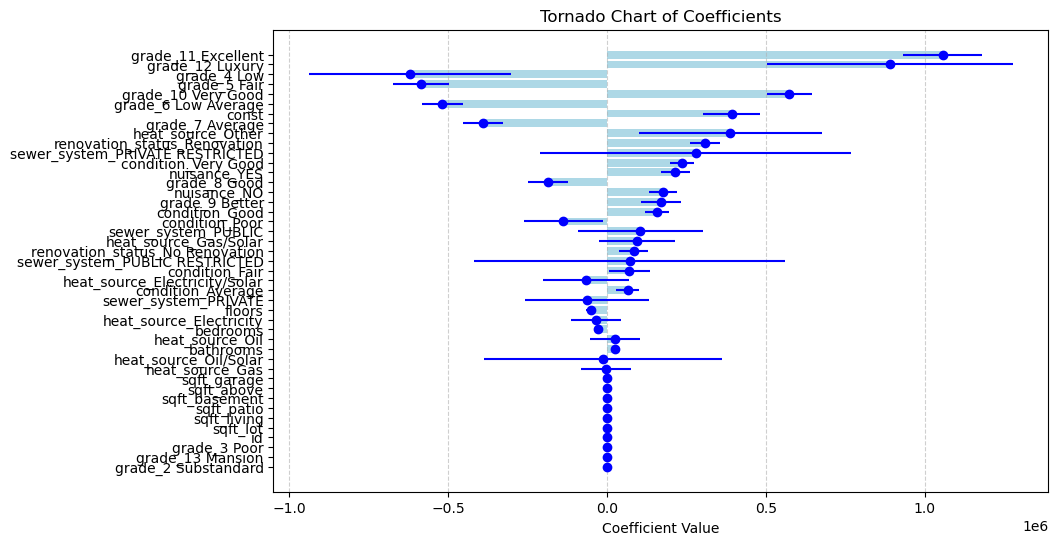

In [50]:

# Extract the coefficients and their standard errors from the regression summary
coefficients = model.params
standard_errors = model.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Working with Only Statistically Significant Data
## Data with p values <.05

In [51]:
# Filter coefficients based on p-values
significant_vars = model.params[model.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars)


const                              3.923079e+05
id                                -2.033897e-06
bedrooms                          -2.951557e+04
bathrooms                          2.593508e+04
sqft_living                        7.363872e+01
sqft_lot                           5.441940e+00
floors                            -5.044697e+04
sqft_above                         1.794791e+02
sqft_basement                      1.692677e+02
sqft_garage                       -2.781672e+02
sqft_patio                         9.777511e+01
condition_Average                  6.526761e+04
condition_Fair                     7.017576e+04
condition_Good                     1.573630e+05
condition_Poor                    -1.374132e+05
condition_Very Good                2.369147e+05
heat_source_Other                  3.878485e+05
renovation_status_No Renovation    8.424272e+04
renovation_status_Renovation       3.080652e+05
grade_10 Very Good                 5.737559e+05
grade_11 Excellent                 1.057

In [52]:
import statsmodels.api as sm

# Ensure 'const' is in the index of significant_vars
if 'const' not in significant_vars.index:
    significant_vars.loc['const'] = 0  # You can set it to 0 or any appropriate value

# List of significant variable names (including 'const')
significant_vars_names = significant_vars.index.tolist()

# Check if 'const' is in df_cleaned columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars_data = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model_significant = sm.OLS(df_cleaned[target_variable], significant_vars_data).fit()

# Print model summary
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     582.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:23:56   Log-Likelihood:            -3.4538e+05
No. Observations:               23960   AIC:                         6.908e+05
Df Residuals:                   23934   BIC:                         6.910e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

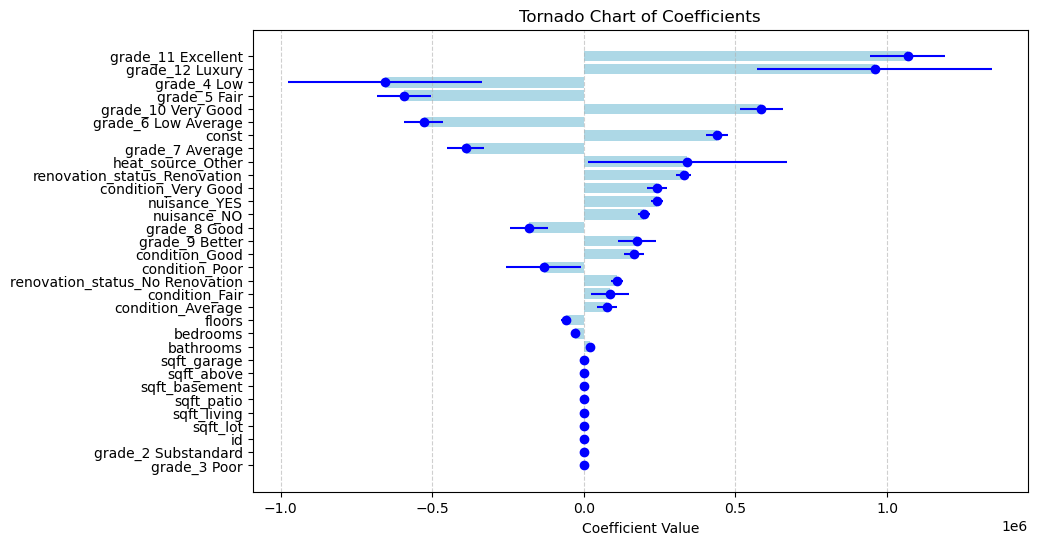

In [53]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = model_significant.params
standard_errors = model_significant.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

plt.show()


In [54]:
# return the standard error for 
# all coefficients in the equation
model_significant.bse

const                              1.798370e+04
id                                 9.954656e-07
bedrooms                           4.340308e+03
bathrooms                          6.044847e+03
sqft_living                        1.446003e+01
sqft_lot                           4.689225e-01
floors                             8.041735e+03
sqft_above                         1.466451e+01
sqft_basement                      9.826942e+00
sqft_garage                        1.404108e+01
sqft_patio                         1.478077e+01
condition_Average                  1.634403e+04
condition_Fair                     3.215341e+04
condition_Good                     1.654644e+04
condition_Poor                     6.328096e+04
condition_Very Good                1.740800e+04
heat_source_Other                  1.668492e+05
renovation_status_No Renovation    1.052154e+04
renovation_status_Renovation       1.239439e+04
grade_10 Very Good                 3.594305e+04
grade_11 Excellent                 6.352

## Mean Absolute Error (MAE)
#### This metric tests the accuracy of a regression model. 
#### It measures the absolute difference between the predicted and actual values. 

In [55]:
from sklearn.metrics import mean_absolute_error

predicted_price = model_significant.predict(significant_vars_data)
mae = mean_absolute_error(df_cleaned['price'], predicted_price)

print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 290703.2632863997


## Root Mean Squared Error for Residual (RMSE)

#### This metric asses the goodness of fit of a regression model by examining the errors of residuals. 
#### Residuals are the diffrences between observed values and perdicted values of the model.

In [56]:
rmse_residuals = np.sqrt(model_significant.mse_resid)

# View Root Mean Squared Error for residuals
print(f'Root Mean Squared Error for Residuals: {rmse_residuals}')


Root Mean Squared Error for Residuals: 440870.4505069089


#### The results show that RMSE is larger than MAE
#### Possible explanation for this is there are too many outliers


## Homoscedasticity
#### The assumption that the variance of the residual is constant across all levels of the independent variable.

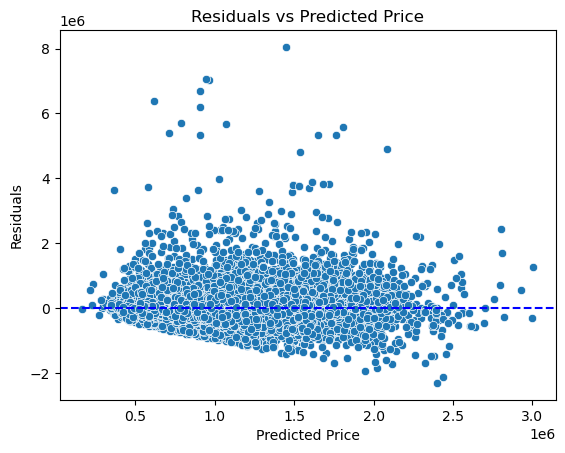

In [57]:
#Checking for Homoscedasticity

y_pred = model_significant.predict(significant_vars_data)  # Replace with your actual predicted values
residuals = df_cleaned['price'] - y_pred  # Calculate residuals

# Create a DataFrame with predicted values and residuals
residuals_df = pd.DataFrame({'Predicted Price': y_pred, 'Residuals': residuals})

# Plot residuals against predicted values
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()


#### The chart remains close to constant (0) indicating homoscedasticity

## Goldfield-Quandt test'
#### Checks for the hetroscedasticity in the residuals 

In [58]:

# Goldfield-Quandt test'
# Checks for heteroscedasticity in the residuals

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test = sms.het_goldfeldquandt(residuals, predictors_int)
name = ['F statistic', 'p-value']

# Display the results
list(zip(name, test))



[('F statistic', 0.9917955379822169), ('p-value', 0.6737218264830364)]

#### The test result indicates that there is no signifanct evidence of heteroscdasticity in the residuals. 

#### Pvalue is >.05 we cannot reject the null, and we can inccur that our residuals are homscatstic

# Visualization of resduals from model

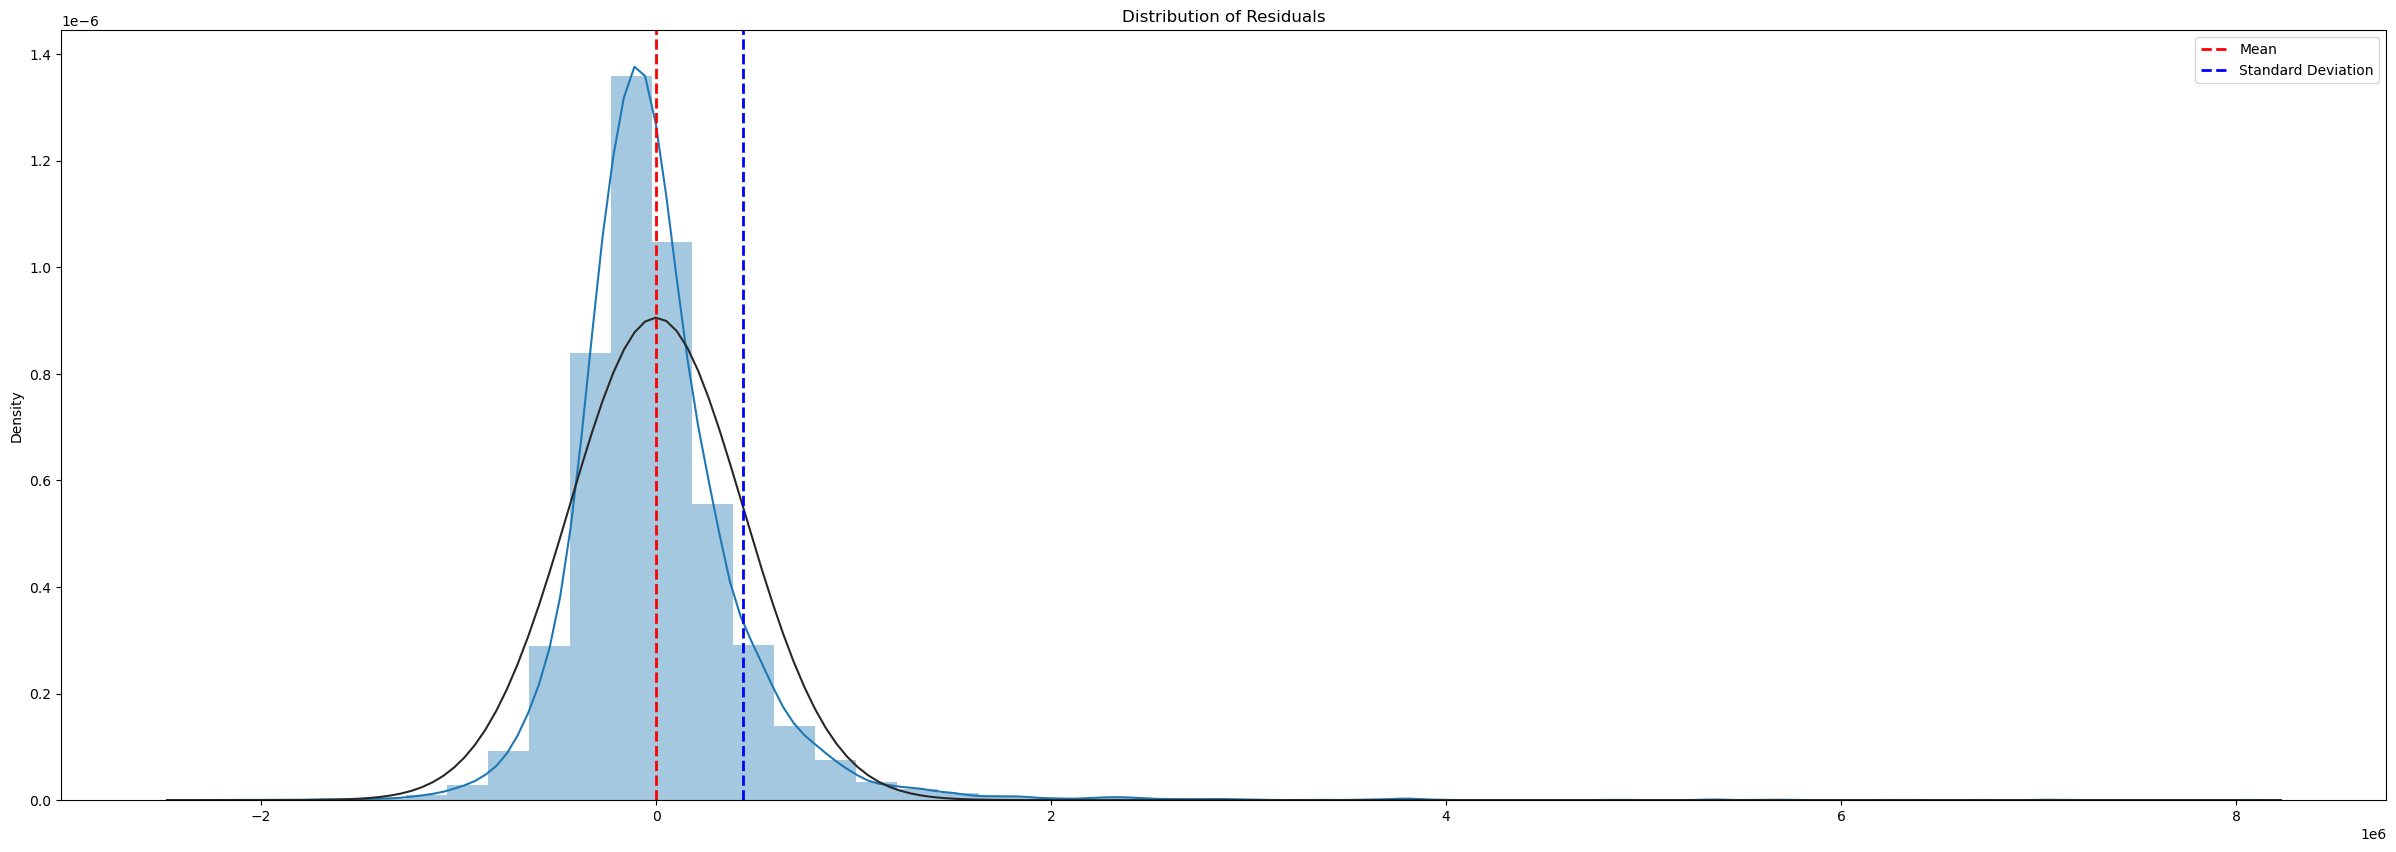

In [59]:

from scipy.stats import norm


residuals = df_cleaned['price'] - y_pred  

# Set a larger figure size
plt.figure(figsize=(30, 10))

# Plot the distribution of residuals
p = sns.distplot(residuals, fit=norm, kde=True)
p = plt.title('Distribution of Residuals')

#  Add a line to represent a normal distribution
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()



#### Mean line = red dash
#### Std line = blue dash
#### Normal distrubution fit = blue curved line

-4.598692818257168e-05 440631.1820793833


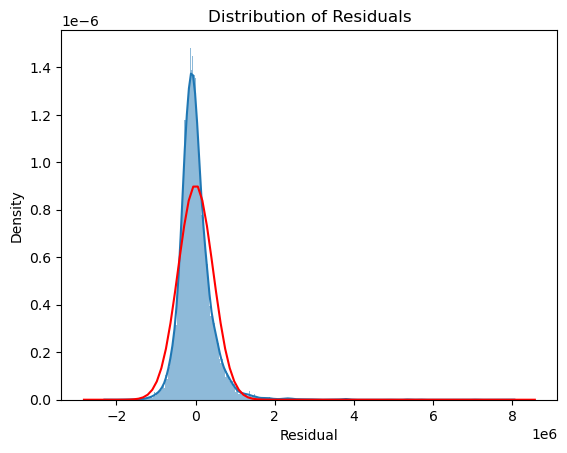

In [60]:

from scipy import stats

# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
print(mu, std)  # Make sure to print the values to see the results

# Re-plot the residuals as a kernel density plot and overlay the normal curve
fig, ax = plt.subplots()

# Plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# Plot the corresponding normal curve
xmin, xmax = plt.xlim()  # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100)  # generate some x values
p = stats.norm.pdf(x, mu, std)  # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)

plt.show()


((array([-4.02138131, -3.8073916 , -3.69038892, ...,  3.69038892,
          3.8073916 ,  4.02138131]),
  array([-2300175.67293882, -2126200.55093144, -1920579.12016031, ...,
          7040060.78201132,  7061031.67804194,  8049371.02388848])),
 (401416.3383308964, -4.5986791357392244e-05, 0.9108553706041848))

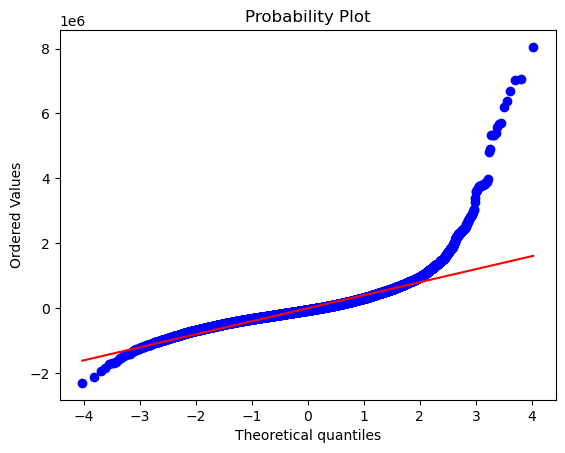

In [61]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)

# Creating new model removing outliers lower than 25% quartile and over 75% quartile

In [62]:
# Display the shape of the original DataFrame
print("Original Data Occurrences: ", df.shape)

# Create a mask for outliers
mask_outliers = np.ones(df.shape[0], dtype=bool)

# Outlier detection for all numeric columns
for column in df.select_dtypes(include=['number']).columns:
    if df[column].notnull().any():  # Check if there are no NaN values in the column
        Q1 = np.percentile(df[column], 25, interpolation='midpoint')
        Q3 = np.percentile(df[column], 75, interpolation='midpoint')
        IQR = Q3 - Q1

        # Setting limits for removal of outliers
        upper_bound = Q3 + 3.0 * IQR
        lower_bound = Q1 - 3.0 * IQR

        # Update the mask to exclude outliers in the current column
        mask_outliers &= (df[column] >= lower_bound) & (df[column] <= upper_bound)

# Apply the mask to the DataFrame to remove outliers
df_cleaned2 = df[mask_outliers]

# Display the shape of the DataFrame after outlier removal
print("Outlier removal occurrences: ", df_cleaned2.shape)



Original Data Occurrences:  (30155, 26)
Outlier removal occurrences:  (24810, 26)


In [63]:
# Display unique values in 'bathrooms' column before outlier removal
print("Unique Bathrooms Before Outlier Removal: ", df['bathrooms'].unique())

# Display unique values in 'bathrooms' column after outlier removal
print("Unique Bathrooms After Outlier Removal: ", df_cleaned2['bathrooms'].unique())


Unique Bathrooms Before Outlier Removal:  [ 1.   2.5  2.   3.   1.5  3.5  4.   5.5  4.5  5.   7.5  0.   6.   9.5
  6.5  7.   0.5 10.5  8.  10.   8.5]
Unique Bathrooms After Outlier Removal:  [1.  2.5 2.  3.  1.5 3.5 4.  5.5 4.5 5.  0.  6.  0.5]


In [64]:
# Display the shape of the original DataFrame
print("Original Data Occurrences: ", df.shape)

# Display the quartiles for the 'bathrooms' column
bathrooms_quartiles = np.percentile(df['bathrooms'], [25, 50, 75], interpolation='midpoint')
Q1_bathrooms, Q2_bathrooms, Q3_bathrooms = bathrooms_quartiles

# Interquartile Range (IQR) for 'bathrooms'
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Setting limits for removal of outliers in 'bathrooms'
upper_bound_bathrooms = Q3_bathrooms + 3.0 * IQR_bathrooms
lower_bound_bathrooms = max(Q1_bathrooms - 3.0 * IQR_bathrooms, 1.0)  # Adjusted lower bound to 1.0

# Display the quartiles and bounds for 'bathrooms'
print("Bathrooms Quartiles:")
print(f"Q1 (25th percentile): {Q1_bathrooms}")
print(f"Q2 (50th percentile - Median): {Q2_bathrooms}")
print(f"Q3 (75th percentile): {Q3_bathrooms}")
print(f"IQR: {IQR_bathrooms}")
print(f"Lower Bound: {lower_bound_bathrooms}")
print(f"Upper Bound: {upper_bound_bathrooms}")

# Create a mask for outliers in 'bathrooms'
mask_outliers_bathrooms = (df['bathrooms'] >= lower_bound_bathrooms) & (df['bathrooms'] <= upper_bound_bathrooms)

# Apply the mask to the DataFrame to remove outliers in 'bathrooms'
df_cleaned2 = df[mask_outliers_bathrooms]

# Display the shape of the DataFrame after outlier removal for 'bathrooms'
print("Outlier removal occurrences for Bathrooms: ", df_cleaned2.shape)



Original Data Occurrences:  (30155, 26)
Bathrooms Quartiles:
Q1 (25th percentile): 2.0
Q2 (50th percentile - Median): 2.5
Q3 (75th percentile): 3.0
IQR: 1.0
Lower Bound: 1.0
Upper Bound: 6.0
Outlier removal occurrences for Bathrooms:  (30063, 26)


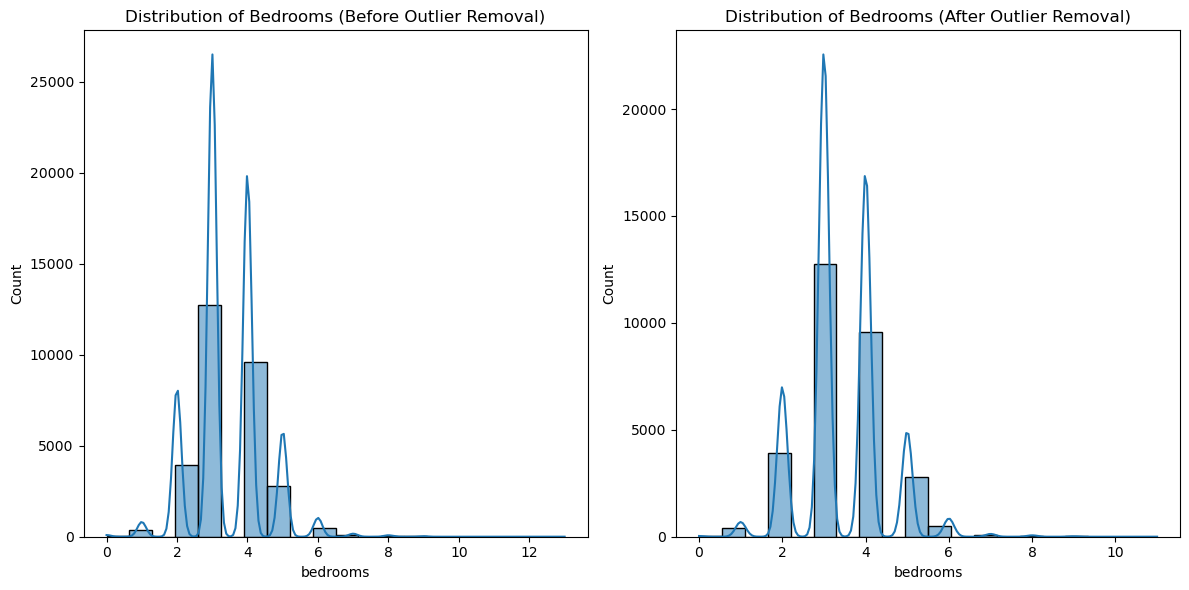

Descriptive Statistics for Bedrooms (Before Outlier Removal):
count    30155.000000
mean         3.413530
std          0.981612
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

Descriptive Statistics for Bedrooms (After Outlier Removal):
count    30063.000000
mean         3.411735
std          0.968253
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the distribution of 'bedrooms' before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['bedrooms'], bins=20, kde=True)
plt.title('Distribution of Bedrooms (Before Outlier Removal)')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned2['bedrooms'], bins=20, kde=True)
plt.title('Distribution of Bedrooms (After Outlier Removal)')

plt.tight_layout()
plt.show()

# Display descriptive statistics for 'bedrooms' before and after outlier removal
print("Descriptive Statistics for Bedrooms (Before Outlier Removal):")
print(df['bedrooms'].describe())

print("\nDescriptive Statistics for Bedrooms (After Outlier Removal):")
print(df_cleaned2['bedrooms'].describe())


In [66]:
# Display quartile values and IQR for 'bedrooms' before and after outlier removal
print("Bedrooms Statistics (Before Outlier Removal):")
print("Q1:", df['bedrooms'].quantile(0.25))
print("Q3:", df['bedrooms'].quantile(0.75))
print("IQR:", df['bedrooms'].quantile(0.75) - df['bedrooms'].quantile(0.25))

print("\nBedrooms Statistics (After Outlier Removal):")
print("Q1:", df_cleaned2['bedrooms'].quantile(0.25))
print("Q3:", df_cleaned2['bedrooms'].quantile(0.75))
print("IQR:", df_cleaned2['bedrooms'].quantile(0.75) - df_cleaned2['bedrooms'].quantile(0.25))


Bedrooms Statistics (Before Outlier Removal):
Q1: 3.0
Q3: 4.0
IQR: 1.0

Bedrooms Statistics (After Outlier Removal):
Q1: 3.0
Q3: 4.0
IQR: 1.0


In [67]:
# Display quartile values and IQR for 'sqft_living' before and after outlier removal
print("sqft_living Statistics (Before Outlier Removal):")
print("Q1:", df['sqft_living'].quantile(0.25))
print("Q3:", df['sqft_living'].quantile(0.75))
print("IQR:", df['sqft_living'].quantile(0.75) - df['sqft_living'].quantile(0.25))

print("\nsqft_living Statistics (After Outlier Removal):")
print("Q1:", df_cleaned2['sqft_living'].quantile(0.25))
print("Q3:", df_cleaned2['sqft_living'].quantile(0.75))
print("IQR:", df_cleaned2['sqft_living'].quantile(0.75) - df_cleaned2['sqft_living'].quantile(0.25))


sqft_living Statistics (Before Outlier Removal):
Q1: 1420.0
Q3: 2619.5
IQR: 1199.5

sqft_living Statistics (After Outlier Removal):
Q1: 1420.0
Q3: 2610.0
IQR: 1190.0


In [68]:
# Display the shape of the original DataFrame
print("Original Data Occurrences: ", df.shape)

# Display the quartiles for the 'bathrooms' column
bathrooms_quartiles = np.percentile(df['bathrooms'], [25, 50, 75], interpolation='midpoint')
Q1_bathrooms, Q2_bathrooms, Q3_bathrooms = bathrooms_quartiles

# Interquartile Range (IQR) for 'bathrooms'
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Setting limits for removal of outliers in 'bathrooms'
upper_bound_bathrooms = Q3_bathrooms + 3.0 * IQR_bathrooms
lower_bound_bathrooms = max(Q1_bathrooms - 3.0 * IQR_bathrooms, 1.0)  # Adjusted lower bound to 1.0

# Display the quartiles and bounds for 'bathrooms'
print("Bathrooms Quartiles:")
print(f"Q1 (25th percentile): {Q1_bathrooms}")
print(f"Q2 (50th percentile - Median): {Q2_bathrooms}")
print(f"Q3 (75th percentile): {Q3_bathrooms}")
print(f"IQR: {IQR_bathrooms}")
print(f"Lower Bound: {lower_bound_bathrooms}")
print(f"Upper Bound: {upper_bound_bathrooms}")

# Create a mask for outliers in 'bathrooms'
mask_outliers_bathrooms = (df['bathrooms'] >= lower_bound_bathrooms) & (df['bathrooms'] <= upper_bound_bathrooms)

# Apply the mask to the DataFrame to remove outliers in 'bathrooms'
df_cleaned2 = df[mask_outliers_bathrooms]

# Display the shape of the DataFrame after outlier removal for 'bathrooms'
print("Outlier removal occurrences for Bathrooms: ", df_cleaned2.shape)


Original Data Occurrences:  (30155, 26)
Bathrooms Quartiles:
Q1 (25th percentile): 2.0
Q2 (50th percentile - Median): 2.5
Q3 (75th percentile): 3.0
IQR: 1.0
Lower Bound: 1.0
Upper Bound: 6.0
Outlier removal occurrences for Bathrooms:  (30063, 26)


In [69]:
# Display quartile values and IQR for 'bedrooms' before and after outlier removal
print("Bedrooms Statistics (Before Outlier Removal):")
print("Q1:", df['bedrooms'].quantile(0.25))
print("Q3:", df['bedrooms'].quantile(0.75))
print("IQR:", df['bedrooms'].quantile(0.75) - df['bedrooms'].quantile(0.25))

# Update the quartile values and IQR for 'bedrooms' after outlier removal using df_cleaned2
print("\nBedrooms Statistics (After Outlier Removal):")
print("Q1:", df_cleaned2['bedrooms'].quantile(0.25))
print("Q3:", df_cleaned2['bedrooms'].quantile(0.75))
print("IQR:", df_cleaned2['bedrooms'].quantile(0.75) - df_cleaned2['bedrooms'].quantile(0.25))

# Display the shape of the original DataFrame
print("\nOriginal Data Occurrences: ", df.shape)

# Display the quartiles for the 'bedrooms' column
bedrooms_quartiles = np.percentile(df['bedrooms'], [25, 50, 75], interpolation='midpoint')
Q1_bedrooms, Q2_bedrooms, Q3_bedrooms = bedrooms_quartiles

# Interquartile Range (IQR) for 'bedrooms'
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Setting limits for removal of outliers in 'bedrooms'
upper_bound_bedrooms = Q3_bedrooms + 3.0 * IQR_bedrooms
lower_bound_bedrooms = max(Q1_bedrooms - 3.0 * IQR_bedrooms, np.min(df['bedrooms']))

# Display the quartiles and bounds for 'bedrooms'
print("\nBedrooms Quartiles:")
print(f"Q1 (25th percentile): {Q1_bedrooms}")
print(f"Q2 (50th percentile - Median): {Q2_bedrooms}")
print(f"Q3 (75th percentile): {Q3_bedrooms}")
print(f"IQR: {IQR_bedrooms}")
print(f"Lower Bound: {lower_bound_bedrooms}")
print(f"Upper Bound: {upper_bound_bedrooms}")

# Create a mask for outliers in 'bedrooms'
mask_outliers_bedrooms = (df['bedrooms'] >= lower_bound_bedrooms) & (df['bedrooms'] <= upper_bound_bedrooms)

# Apply the mask to the DataFrame to remove outliers in 'bedrooms' and update df_cleaned2
df_cleaned2 = df_cleaned2[mask_outliers_bedrooms]

# Display the shape of the DataFrame after outlier removal for 'bedrooms'
print("Outlier removal occurrences for Bedrooms: ", df_cleaned2.shape)


Bedrooms Statistics (Before Outlier Removal):
Q1: 3.0
Q3: 4.0
IQR: 1.0

Bedrooms Statistics (After Outlier Removal):
Q1: 3.0
Q3: 4.0
IQR: 1.0

Original Data Occurrences:  (30155, 26)

Bedrooms Quartiles:
Q1 (25th percentile): 3.0
Q2 (50th percentile - Median): 3.0
Q3 (75th percentile): 4.0
IQR: 1.0
Lower Bound: 0.0
Upper Bound: 7.0
Outlier removal occurrences for Bedrooms:  (30013, 26)


In [70]:
# List of columns to remove
columns_to_remove = ['address', 'date', 'lat', 'long', 'date', 'yr_built', 'yr_renovated', 'greenbelt', 'view', 'waterfront']


In [71]:
# List of columns to remove
columns_to_remove = ['address', 'date', 'lat', 'long', 'date', 'yr_built', 'yr_renovated', 'greenbelt', 'view', 'waterfront']

# Remove specified columns from df_cleaned2
df_cleaned2 = df_cleaned2.drop(columns=columns_to_remove, errors='ignore')

# Display the shape of the DataFrame after column removal
print("DataFrame shape after column removal: ", df_cleaned2.shape)


DataFrame shape after column removal:  (30013, 17)


In [72]:
print(df_cleaned2.dtypes)


id                     int64
price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
nuisance              object
condition             object
grade                 object
heat_source           object
sewer_system          object
sqft_above             int64
sqft_basement          int64
sqft_garage            int64
sqft_patio             int64
renovation_status     object
dtype: object


In [73]:


# Perform one-hot encoding for categorical variables
df_cleaned2 = pd.get_dummies(df_cleaned2, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])

# Check the updated DataFrame
print("Updated DataFrame:\n", df_cleaned2.head())

# Continue with regression analysis
predictors_int = sm.add_constant(df_cleaned2.drop(['price'], axis=1))
modelsig2 = sm.OLS(df_cleaned2['price'], predictors_int).fit()

# Filter coefficients based on p-values
significant_vars2 = modelsig2.params[modelsig2.pvalues < 0.05]

# Display coefficients of significant variables
print("Significant Variables:\n", significant_vars2)

# Print model summary
print(modelsig2.summary())




Updated DataFrame:
            id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
4  8562780790  592500.0         2        2.0         1120       758     2.0   

   sqft_above  sqft_basement  sqft_garage  sqft_patio  condition_Average  \
0        1180              0            0          40                  0   
1        1570           1570            0         240                  1   
2        1580           1580            0           0                  1   
3        1090           1070          200         270                  1   
4        1120            550          550          30                  1   

   condition_Fair  condition_Good  condition_Poo

In [74]:
# Filter and display p-values of significant variables
significant_p_values = modelsig2.pvalues[modelsig2.pvalues < 0.05]
print("P-values of significant variables:\n", significant_p_values)



P-values of significant variables:
 const                              3.817536e-11
id                                 1.535565e-05
bedrooms                           1.826957e-34
bathrooms                          5.910385e-17
sqft_living                        3.924111e-12
sqft_lot                           8.827546e-08
floors                             2.573892e-26
sqft_above                         3.317992e-39
sqft_basement                      2.231855e-43
sqft_garage                        2.532685e-76
sqft_patio                         5.695874e-31
condition_Average                  1.202355e-03
condition_Fair                     3.288592e-02
condition_Good                     1.277196e-10
condition_Very Good                3.283794e-19
heat_source_Gas/Solar              3.062750e-02
renovation_status_No Renovation    6.021781e-05
renovation_status_Renovation       2.944051e-19
grade_1 Cabin                      1.169388e-02
grade_11 Excellent                 2.808161e-32
grad

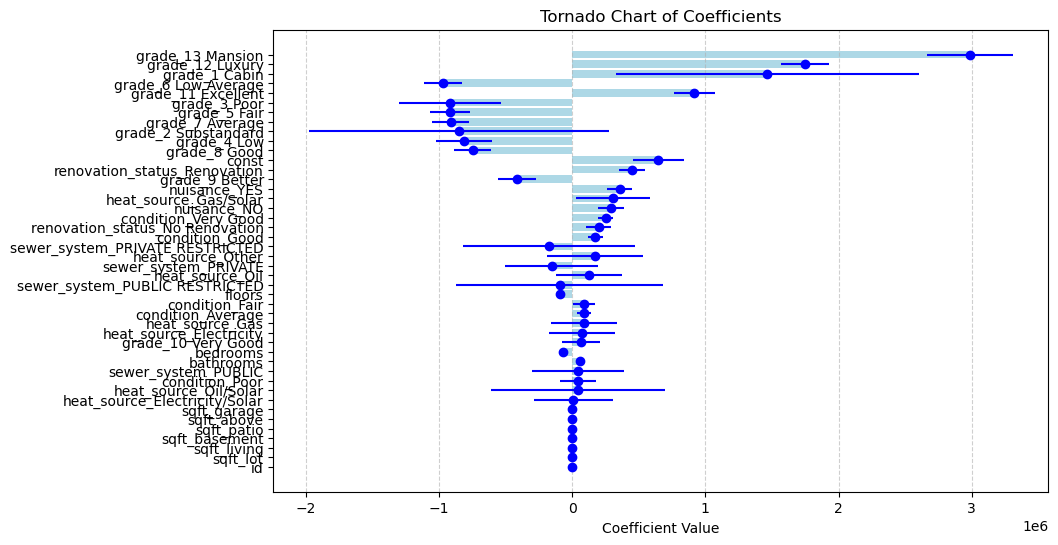

In [75]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = modelsig2.params
standard_errors = modelsig2.bse

# Calculate absolute values of coefficients for sorting
absolute_coefficients = abs(coefficients)

# Extract and sort the p-values and corresponding variable names
p_values_sorted = modelsig2.pvalues.sort_values(ascending=True)
sorted_indices = absolute_coefficients.sort_values(ascending=False).index[::-1]

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), labels=sorted_indices)
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()




In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions using the significant variables
predictions_significant2 = modelsig2.predict(predictors_int)

# Actual target values
actual_values = df_cleaned2['price']

# Calculate Mean Absolute Error (MAE)
mae_significant2 = mean_absolute_error(actual_values, predictions_significant2)

# Calculate Root Mean Squared Error (RMSE)
rmse_significant2 = np.sqrt(mean_squared_error(actual_values, predictions_significant2))

# Print the results
print("Mean Absolute Error (MAE):", mae_significant2)
print("Root Mean Squared Error (RMSE):", rmse_significant2)


Mean Absolute Error (MAE): 337213.2069308278
Root Mean Squared Error (RMSE): 612681.6599119805


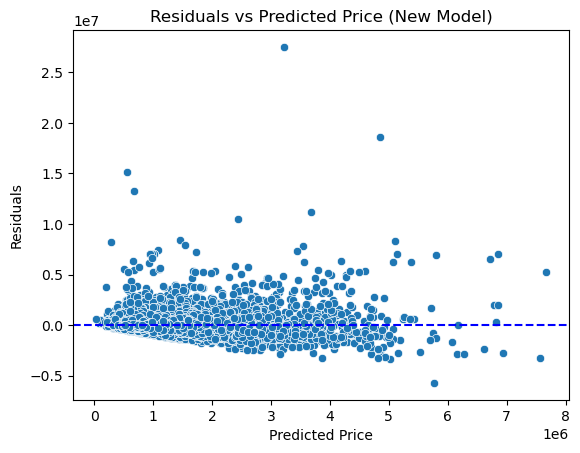

In [77]:
# Predictions using significant variables
y_pred_significant2 = modelsig2.predict(predictors_int)

# Residuals calculation
residuals_significant2 = df_cleaned2['price'] - y_pred_significant2

# Create a DataFrame with predicted values and residuals
residuals_df_significant2 = pd.DataFrame({'Predicted Price': y_pred_significant2, 'Residuals': residuals_significant2})

# Plot residuals against predicted values
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df_significant2)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (New Model)')
plt.show()


In [78]:
# Residuals calculation for the new model
residuals_new = df_cleaned2['price'] - y_pred_significant2

# Perform the Goldfeld-Quandt test
test_new = sms.het_goldfeldquandt(residuals_new, predictors_int)
name = ['F statistic', 'p-value']

# Display the results
lzip(name, test_new)



[('F statistic', 0.8233200132428664), ('p-value', 0.9999999999999999)]

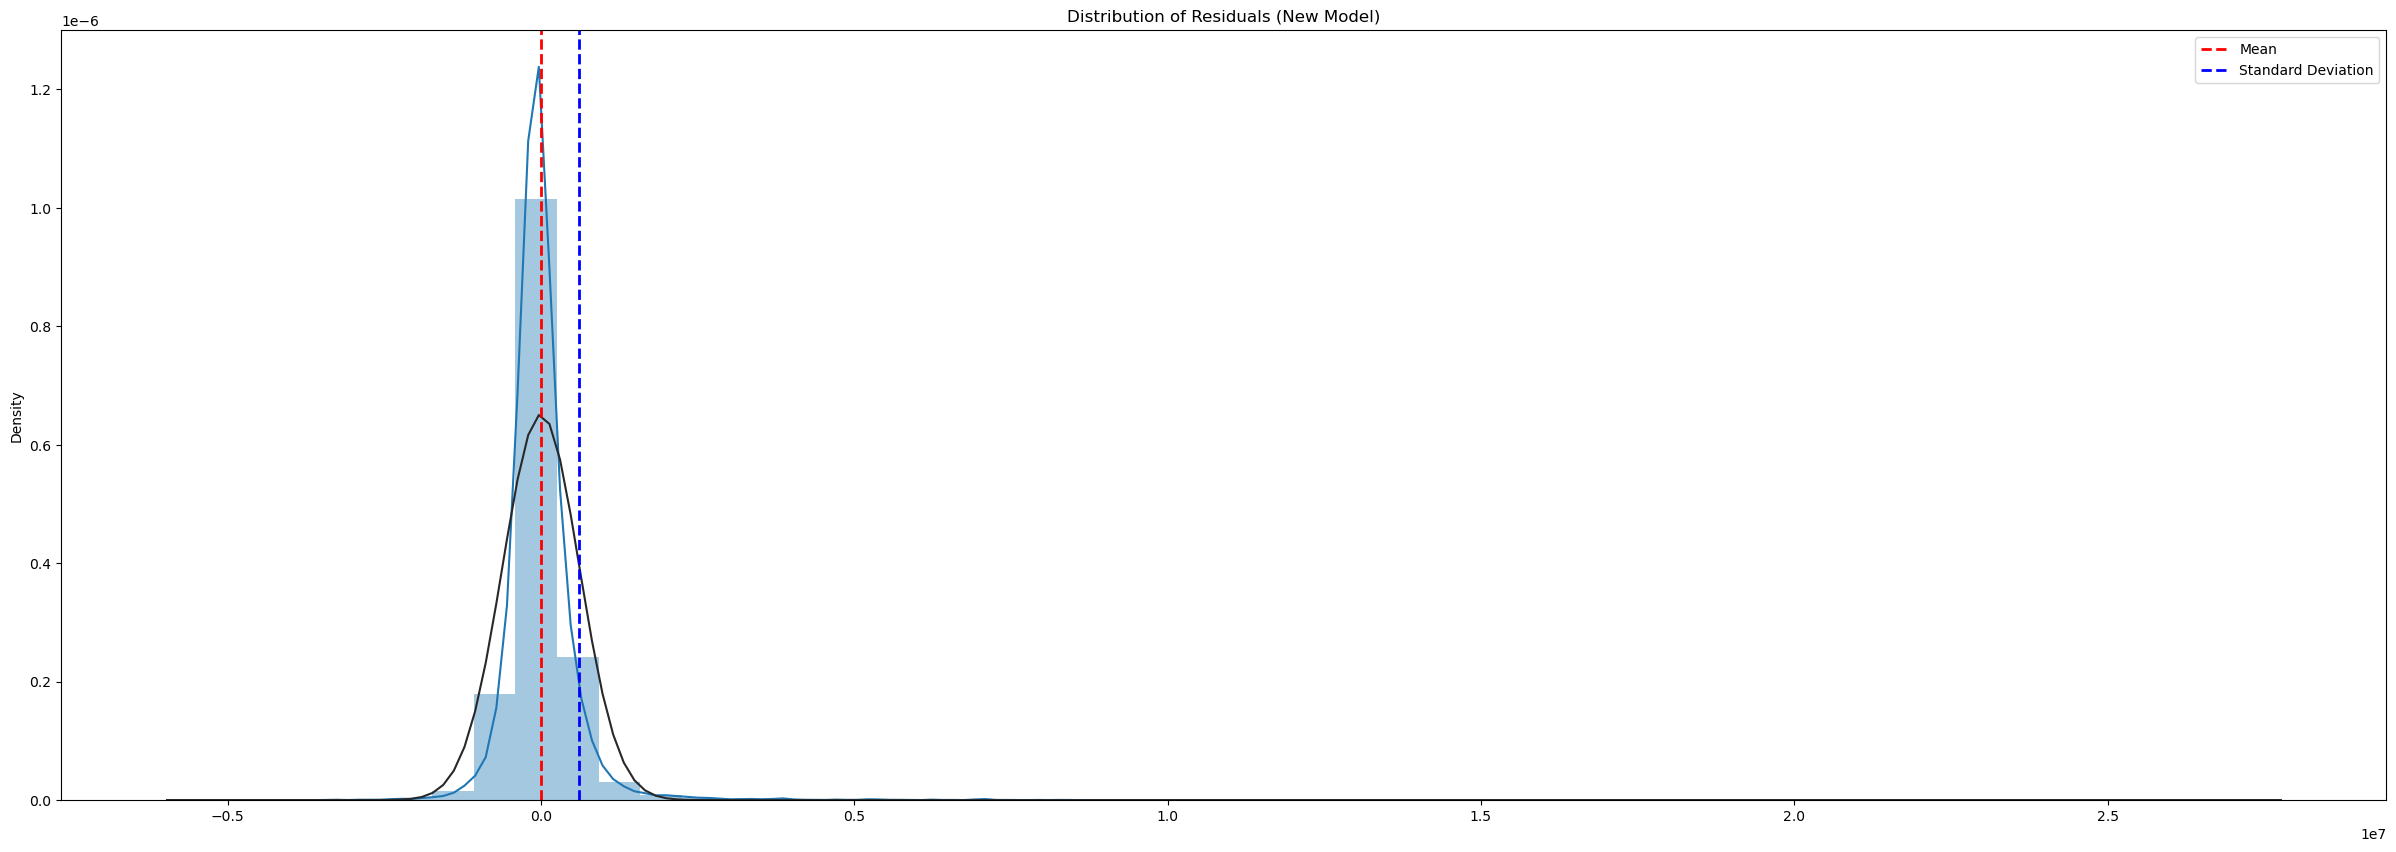

In [79]:
from scipy.stats import norm

# Residuals calculation for the new model
residuals_new = df_cleaned2['price'] - y_pred_significant2  # Assuming 'y_pred_significant2' is your new model's predictions

# Set a larger figure size
plt.figure(figsize=(30, 10))

# Plot the distribution of residuals for the new model
p = sns.distplot(residuals_new, fit=norm, kde=True)
p = plt.title('Distribution of Residuals (New Model)')

# Add a line to represent a normal distribution
plt.axvline(residuals_new.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals_new.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()


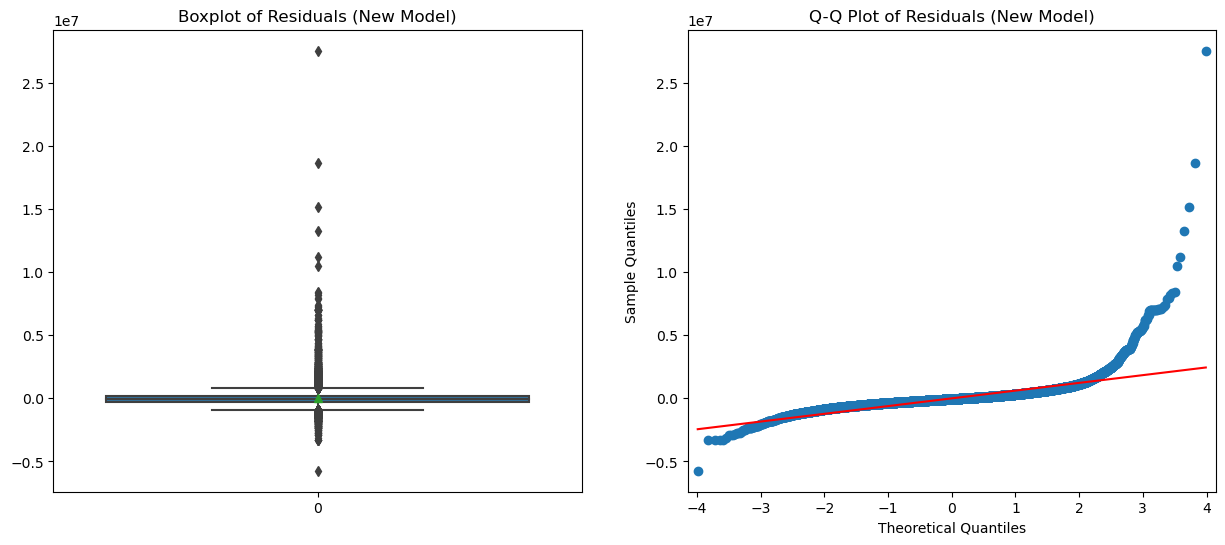

In [80]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals calculation for the new model
residuals_new = df_cleaned2['price'] - y_pred_significant2  

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot of residuals
sns.boxplot(residuals_new, showmeans=True, ax=axes[0])
axes[0].set_title('Boxplot of Residuals (New Model)')

# Q-Q plot of residuals
sm.qqplot(residuals_new, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals (New Model)')

# Show the plots
plt.show()



In [81]:

from statsmodels.stats.stattools import durbin_watson

residuals = df_cleaned2['price'] - y_pred_significant2  

# Calculate the Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)


Durbin-Watson Statistic: 1.8226780336169226


In [82]:
#### Value is close to 2 which suggests that there is no autocorrelation in the residuals. 

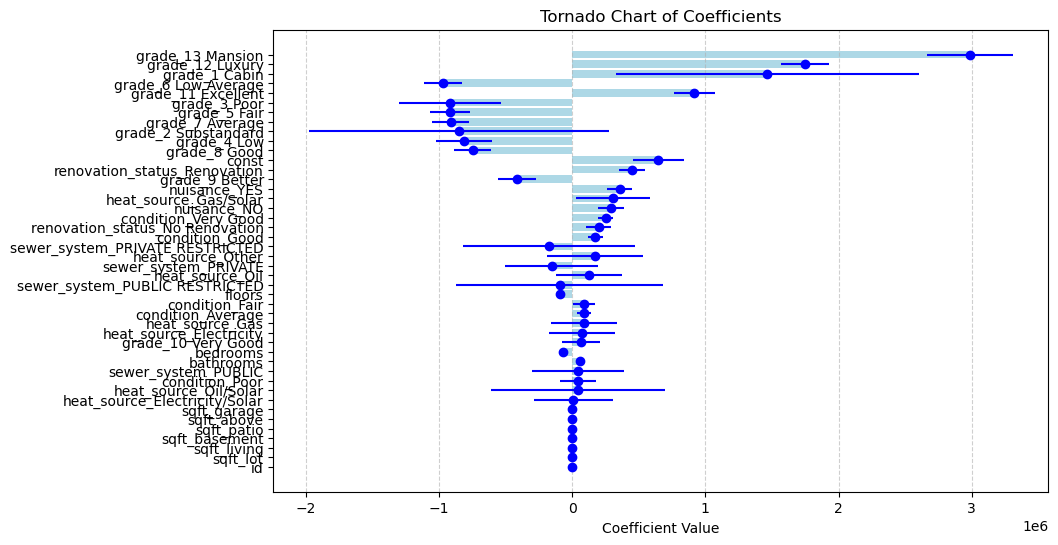

In [83]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = modelsig2.params
standard_errors = modelsig2.bse

# Calculate absolute values of coefficients for sorting
absolute_coefficients = abs(coefficients)

# Extract and sort the p-values and corresponding variable names
p_values_sorted = modelsig2.pvalues.sort_values(ascending=True)
sorted_indices = absolute_coefficients.sort_values(ascending=False).index[::-1]

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), labels=sorted_indices)
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [84]:
# Get the coefficients for the grade categories from the regression model
grade_coefficients = modelsig2.params.filter(like='grade_')

# Calculate the average price for each grade category using the coefficients
avg_price_by_grade = {}
for grade_category in grade_coefficients.index:
    avg_price_by_grade[grade_category] = df_cleaned2[df_cleaned2[grade_category] == 1]['price'].mean()

# Print the average price for each grade category
print("Average price by grade:")
for grade, avg_price in avg_price_by_grade.items():
    print(f"{grade}: {avg_price}")


Average price by grade:
grade_1 Cabin: 2500000.0
grade_10 Very Good: 2334151.6104181954
grade_11 Excellent: 3465176.448979592
grade_12 Luxury: 4620180.444444444
grade_13 Mansion: 6598609.866666666
grade_2 Substandard: 400000.0
grade_3 Poor: 499800.0
grade_4 Low: 620918.5625
grade_5 Fair: 617161.6828644502
grade_6 Low Average: 653222.2105078809
grade_7 Average: 819473.8744317695
grade_8 Good: 1082488.1157456795
grade_9 Better: 1585768.9673340358


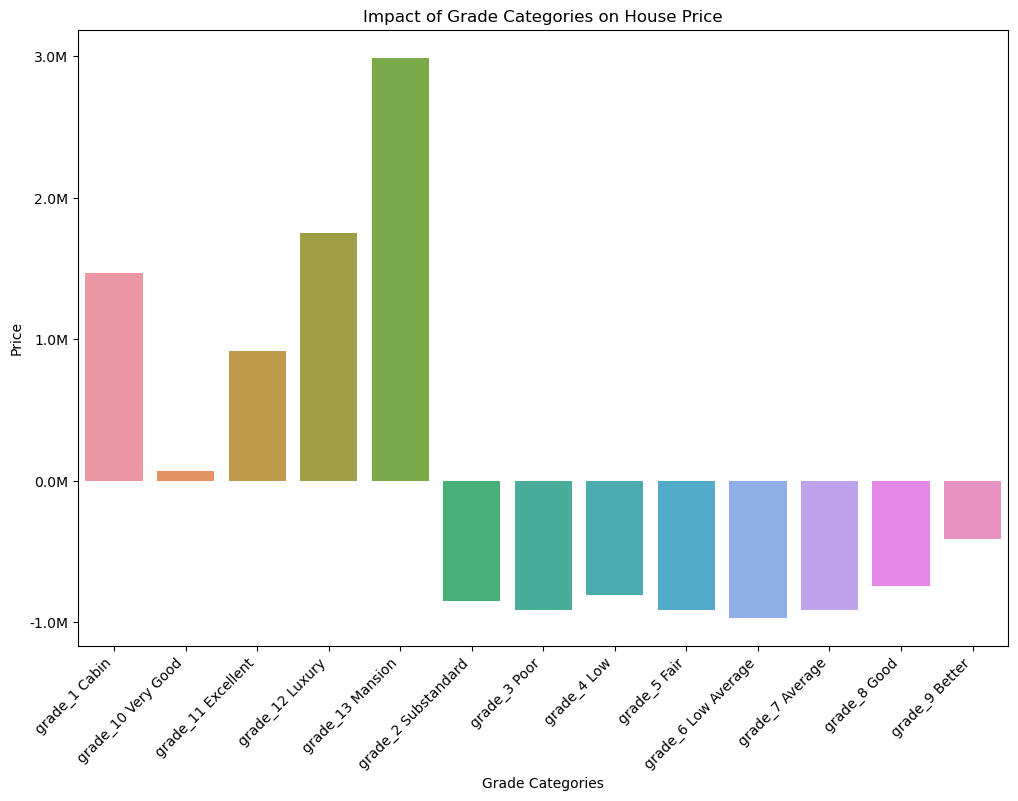

In [85]:
# Plotting

plt.figure(figsize=(12, 8))
sns.barplot(x=grade_coefficients.index, y=grade_coefficients.values)
plt.title('Impact of Grade Categories on House Price')
plt.xlabel('Grade Categories')
plt.ylabel('Price')

# Set custom y-axis ticks and labels based on the actual coefficients
custom_y_ticks = [-1000000, 0, 1000000, 2000000, 3000000]
custom_y_labels = [f'{val/1000000:.1f}M' for val in custom_y_ticks]  # Adjusted for millions
plt.yticks(custom_y_ticks, labels=custom_y_labels)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [86]:
# Count of values in the 'cabin' column
cabin_counts = df_cleaned2['grade_1 Cabin'].value_counts()

# Display descriptive statistics for the 'cabin' column
cabin_stats = df_cleaned2['grade_1 Cabin'].describe()

# Display the counts
print("Cabin Counts:\n", cabin_counts)

# Display descriptive statistics
print("\nCabin Descriptive Statistics:\n", cabin_stats)


Cabin Counts:
 0    30012
1        1
Name: grade_1 Cabin, dtype: int64

Cabin Descriptive Statistics:
 count    30013.000000
mean         0.000033
std          0.005772
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grade_1 Cabin, dtype: float64


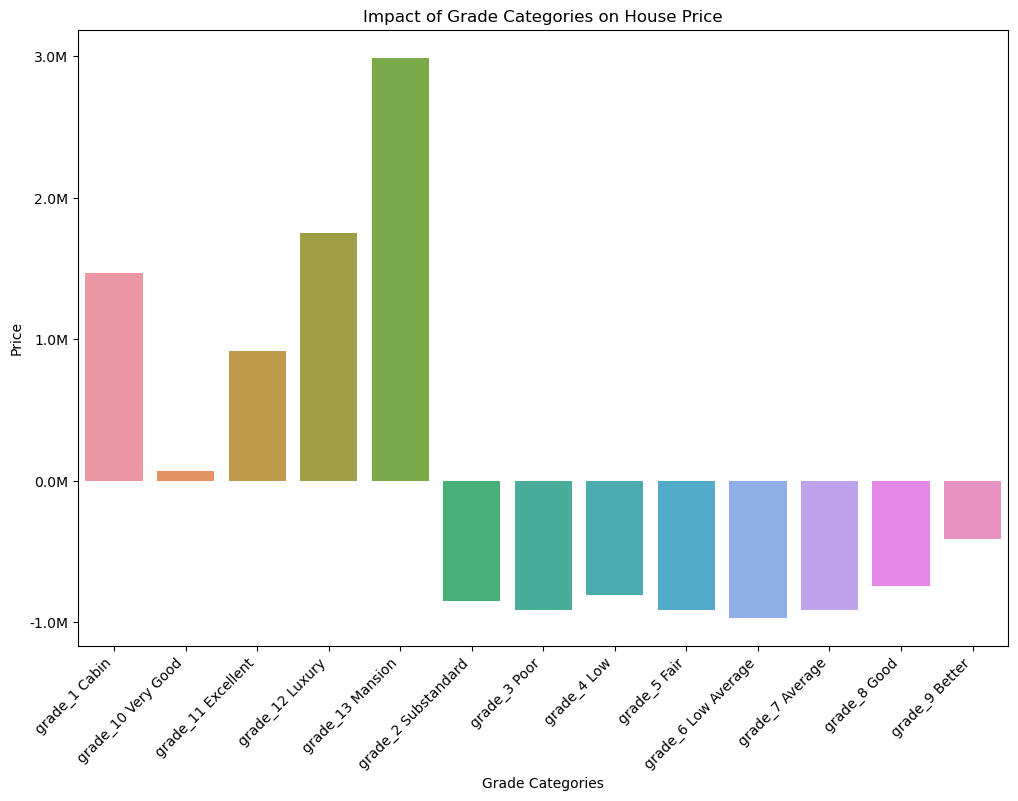

In [87]:
# Plotting
# Exclude 'grade 1' from grade_coefficients
grade_coefficients_without_grade1 = grade_coefficients.drop(index='grade_1 Cabin')
plt.figure(figsize=(12, 8))
sns.barplot(x=grade_coefficients.index, y=grade_coefficients.values)
plt.title('Impact of Grade Categories on House Price')
plt.xlabel('Grade Categories')
plt.ylabel('Price')

# Set custom y-axis ticks and labels based on the actual coefficients
custom_y_ticks = [-1000000, 0, 1000000, 2000000, 3000000]
custom_y_labels = [f'{val/1000000:.1f}M' for val in custom_y_ticks]  # Adjusted for millions
plt.yticks(custom_y_ticks, labels=custom_y_labels)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



In [88]:
# Calculate average price by number of bathrooms
avg_price_by_bathrooms = df_cleaned2.groupby('bathrooms')['price'].mean()

# Display the average price by number of bathrooms
print("Average Price by Number of Bathrooms:\n", avg_price_by_bathrooms)


Average Price by Number of Bathrooms:
 bathrooms
1.0    7.104382e+05
1.5    7.834481e+05
2.0    8.933116e+05
2.5    1.072187e+06
3.0    1.244264e+06
3.5    1.725348e+06
4.0    1.913017e+06
4.5    2.775561e+06
5.0    3.260161e+06
5.5    3.596761e+06
6.0    4.435230e+06
Name: price, dtype: float64


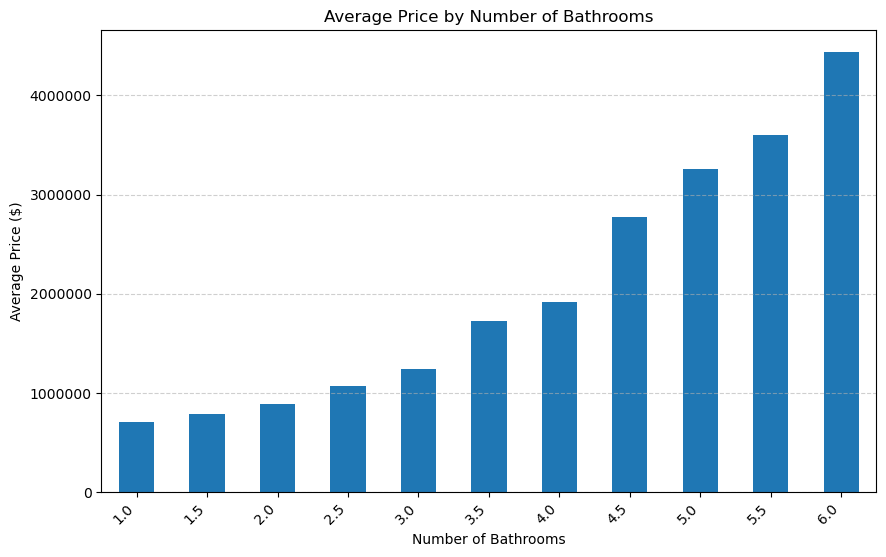

In [89]:
# Plot the average price by number of bathrooms
plt.figure(figsize=(10, 6))
avg_price_by_bathrooms.plot(kind='bar')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Format y-axis ticks to display prices in dollars
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability

plt.show()


In [90]:
# Define the bathroom counts for which you want to calculate average prices
bathroom_counts = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

# Iterate over each bathroom count and calculate the average price
for count in bathroom_counts:
    avg_price = df_cleaned2[df_cleaned2['bathrooms'] == count]['price'].mean()
    print(f"Average price for houses with {count} bathroom(s):", avg_price)


Average price for houses with 1.0 bathroom(s): 710438.2423513986
Average price for houses with 1.5 bathroom(s): 783448.1465707965
Average price for houses with 2.0 bathroom(s): 893311.635225262
Average price for houses with 2.5 bathroom(s): 1072187.1049462873
Average price for houses with 3.0 bathroom(s): 1244264.0272705138
Average price for houses with 3.5 bathroom(s): 1725348.3648827951
Average price for houses with 4.0 bathroom(s): 1913016.6993670885
Average price for houses with 4.5 bathroom(s): 2775561.3882575757
Average price for houses with 5.0 bathroom(s): 3260160.638297872
Average price for houses with 5.5 bathroom(s): 3596761.18627451
Average price for houses with 6.0 bathroom(s): 4435230.025
